<a href="https://colab.research.google.com/github/marciopugnal/mvp-machine-learning/blob/main/mvp_machine_learning_tabuleiro_v21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP Machine Learning & Analytics

**Nome:** MÁRCIO DE LIMA LOSS PUGNAL

**Código Aluno:** 4052025000363

**Curso:** Pós CIÊNCIA DE DADOS E ANALYTICS

**Dataset:** [Board-Games] [fonte: https://www.kaggle.com/datasets/andrewmvd/board-games ]  

### 🧩 1. Introdução e Definição do Problema  


#### 1.1. Sobre o Dataset  
O conjunto de dados, denominado **Board-Games**, foi coletado em fevereiro de 2021 a partir do site BoardGameGeek (BGG), a maior coleção online de dados sobre jogos de tabuleiro.  
O BGG abrange mais de 100.000 títulos, e a comunidade voluntária contribui ativamente com análises, classificações e outras informações.  
Este dataset inclui todos os jogos classificados (~20.000) na data da coleta, que para serem elegíveis, precisam ter recebido no mínimo 30 votos dos usuários.  
*Jogos não classificados* foram desconsiderados, pois, para que um título seja elegível para classificação, ele precisa ter recebido pelo menos 30 votos dos usuários do BGG.

#### 1.2. Descrição do Problema  
O objetivo deste trabalho é analisar um dataset multivariado e estruturado de jogos de tabuleiro.  
O conjunto de dados contém características como avaliações, complexidade, tempo de jogo, mecânicas e domínios.  
A partir dessas informações, busca-se analisar os fatores que influenciam a preferência e o engajamento em um jogo, bem como possíveis correlações entre as características associadas.  
O desafio é extrair insights significativos para identificar tendências, fatores de popularidade, padrões de comportamento e a relação entre o jogo e o jogador.

#### 1.3. Hipóteses do Problema  
As hipóteses formuladas são as seguintes:  

a) A complexidade influencia na avaliação dos jogos?  
b) Jogos mais longos são mais bem avaliados?  
c) A idade mínima recomendada afeta a avaliação dos jogos?  
d) Jogos com maior número de jogadores são menos ou mais bem avaliados?  
e) Jogos de determinadas época compartilham características que os diferenciam de jogos de outras épocas?  
f) Mecânicas e Subgêneros influenciam a avaliação dos jogos?

#### 1.4. Tipo de Problema
A análise será realizada por meio de técnicas de **agrupamento (clustering)**, com o propósito de explorar a estrutura dos dados, identificar padrões e revelar sua organização intrínseca.  
Será empregado um **pipeline de aprendizagem não supervisionado**, que dispensa variáveis-alvo ou rótulos previamente definidos.  
A aplicação de algoritmos de clustering permitirá detectar padrões ocultos, identificar clusters naturais e apontar possíveis anomalias, possibilitando mapear perfis de popularidade e descobrir fatores comuns entre jogos e a comunidade de jogadores.

#### 1.5. Seleção de Dados

O dataset "Board-Games" está disponível na Kaggle (vide fonte acima), porém necessita de etapas de seleção de dados, pois ainda não foi curado. Ele não passou por um processo de organização, limpeza e validação para garantir sua qualidade e usabilidade.

#### 1.6. Atributos do Dataset

O dataset "Board-Games" ou "Jogos de Tabuleiros" disponível contém 20.343 instâncias (amostras), distribuídas em 14 atributos (variáveis) relacionados a seguir:

**ID:** Identificação BoardGamesGeek  
**Name:** Nome do jogo de tabuleiro  
**Year Published:** Ano de publicação  
**Min Players:** Número Mínimo de Jogadores  
**Max Players:** Número Máximo de Jogadores  
**Play Time:** Tempo médio de jogo (minutos)   
**Min Age:** Idade Mínima (Classificação etária)   
**Users Rated:** Usuários avaliados (Quantidade de usuários que analisaram o jogo)  
**Rating Average:** Média de Classificação  
**BGG Rank:** Classificação BGG (BoardGameGeek)  
**Complexity Average:** Média de Complexidade (Classificação de complexidade)  
**Owned Users:** Usuários Proprietários  (Quantidade de usuários que possuem o jogo)  
**Mechanics:** Mecânica do jogo  
**Domains:** Domínios ou Subgênero de jogo

### ✨ 2. O Pipeline de Clusterização


#### 2.1. Estrutura da Classe
O pipeline será estruturado por meio da **class TabuleiroClusteringPipeline**, responsável por encapsular a lógica de execução e os parâmetros do fluxo de trabalho. Essa abordagem favorece a modularização, a escalabilidade e a reutilização do código em diferentes contextos de análise.

In [1]:
# Executa o pipeline de clusterização do dataset de jogos de tabuleiro

# Definição da Classe TabuleiroClusteringPipeline
class TabuleiroClusteringPipeline:

    def __init__(self):

        # Atributos relacionados aos dados
        self.df_tabuleiro = None                        # DataFrame original com os dados dos jogos
        self.df_tabuleiro_tratado = None                # DataFrame após tratamento inicial (limpeza, filtragem)
        self.df_tabuleiro_codificado = None             # DataFrame com variáveis categóricas codificadas
        self.df_tabuleiro_padronizado_completo = None   # DataFrame padronizados com todas as variáveis
        self.df_tabuleiro_padronizado = None            # DataFrame padronizados com variáveis selecionadas
        self.df_tabuleiro_padronizado_95 = None         # DataFrame com 95% da variância explicada (PCA)
        self.df_tabuleiro_limpo = None                  # DataFrame finais prontos para análise

        # Atributos de redução de dimensionalidade
        self.pca_resultado_reduzido_95 = None           # Resultado da redução com PCA (95% variância)
        self.tsne_2components = None                    # Resultado da redução com t-SNE (2 dimensões)

        # Atributos de clusterização
        self.otimo_k_kmeans = None                      # Número ideal de clusters para K-Means
        self.otimo_k_hca = None                         # Número ideal de clusters para HCA

        self.otimo_dbscan_params = None                 # Parâmetros ótimos para DBSCAN (eps, min_samples)
        self.otimo_dbscan_silhouette = None             # Silhouette score do DBSCAN
        self.otimo_dbscan_clusters = None               # Número de clusters identificados pelo DBSCAN

        # Atributos de avaliação e modelo final
        self.best_model_name = None                     # Nome do modelo com melhor desempenho
        self.melhor_modelo_ncluster = None              # Número de clusters do melhor modelo
        self.final_model = None                         # Instância do modelo final selecionado
        self.final_modelo_labels = None                 # Dados do modelo final


    # ETAPAS DO PIPELINE (assinaturas para documentação)
    def carrega_dados(self):
        """Carrega os dados dos jogos de tabuleiro a partir do repositório (ex: GitHub)"""
        pass

    def analise_exploratoria(self):
        """Executa análise exploratória para entender distribuição, correlações e outliers"""
        pass

    def preprocessa_dados(self):
        """Realiza limpeza dos dados, tratamento de valores ausentes e filtragem"""
        pass

    def tranformacao_dados(self):
        """Aplica codificação de variáveis categóricas e padronização de variáveis numéricas"""
        pass

    def reducao_dimensionalidade(self):
        """Reduz a dimensionalidade dos dados usando PCA e t-SNE para facilitar visualização e agrupamento"""
        pass

    def kmeans_clustering(self):
        """Aplica o algoritmo K-Means para identificar agrupamentos nos dados"""
        pass

    def hierarchical_clustering(self):
        """Executa clusterização hierárquica (HCA) com linkage e dendrograma"""
        pass

    def dbscan_clustering(self):
        """Aplica o algoritmo DBSCAN para identificar clusters com base em densidade"""
        pass

    def modelo_comparacao(self):
        """Compara os modelos de clusterização usando métricas como Silhouette, Calinski-Harabasz e Davies-Bouldin"""
        pass

    def cross_validation(self):
        """Executa validação cruzada para verificar a estabilidade dos agrupamentos"""
        pass

    def final_clustering(self):
        """Seleciona e aplica o melhor modelo de clusterização com base nas comparações"""
        pass

    def resumo_resultado(self):
        """Salva os resultados finais do pipeline, incluindo agrupamentos e visualizações"""
        pass

### 📥 3. Implementação e Análise das Etapas
#### 3.1. Importação de bibliotecas
Esta seção reúne todas as bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.

In [2]:
# Importar e tornar globais todas as bibliotecas necessárias

def importar_bibliotecas():
    """Importa todas as bibliotecas utilizadas no projeto e as torna disponíveis globalmente."""

    print("=" * 60)
    print("IMPORTAÇÃO DAS BIBLIOTECAS")
    print("=" * 60)

    # Definição de variáveis globais para uso em todo o projeto
    global pd, np, plt, sns, Counter
    global PCA, StandardScaler, MinMaxScaler, LabelEncoder, TSNE
    global KMeans, DBSCAN, AgglomerativeClustering
    global linkage, dendrogram, fcluster
    global silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
    global KFold, GridSearchCV
    global mode, StatisticsError
    global warnings, random, sys

    # Bibliotecas padrão
    import random
    import sys

    # Manipulação de dados
    import pandas as pd
    import numpy as np
    from collections import Counter

    # Estatísticas
    from statistics import mode, StatisticsError

    # Visualização
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Redução de dimensionalidade
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

    # Pré-processamento
    from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

    # Algoritmos de clusterização
    from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

    # Clusterização hierárquica
    from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

    # Métricas de avaliação de cluster
    from sklearn.metrics import silhouette_score
    from sklearn.metrics import silhouette_samples
    from sklearn.metrics import calinski_harabasz_score
    from sklearn.metrics import davies_bouldin_score

    # Validação e seleção de modelos
    from sklearn.model_selection import KFold, GridSearchCV

    # Controle de avisos
    import warnings
    warnings.filterwarnings("ignore")

    # Informações de ambiente
    print("Bibliotecas importadas com sucesso!")
    print("Versão do Python:", sys.version.split()[0])

    # Retorna todas as variáveis locais
    return locals()

#### 3.2. Coleta e Carga de Dados  
Esta seção realizar o carregamento inicial do dataset "Board-Games".

In [3]:
# Método com a implementação do carregamento de dados

def carrega_dados_implementacao(self):
    """Carrega os dados do repositório GitHub"""

    print("=" * 60)
    print("CARREGAMENTO DOS DADOS")
    print("=" * 60)

    # URL do dataset para ser importado:
    url_dados = "https://raw.githubusercontent.com/marciopugnal/mvp-machine-learning/refs/heads/main/bgg_dataset.csv"

    # Lê o arquivo já com os cabeçalhos das colunas.
    # Os atributos são separados por ";", pois as vírgulas estão presentes nos campos de texto livre.
    self.df_tabuleiro = pd.read_csv(url_dados, delimiter=';')

    print('Arquivo <bgg_dataset.csv> importados com sucesso do github!')
    print('Salvo no dataframe <df_tabuleiro>')

    return self.df_tabuleiro

***📌Comentário:***   
*Como os dados já estavam previamente disponíveis no site do Kaggle, sob o nome "Board-Games", a etapa de coleta foi substituída pelo carregamento local. O dataset (base de dados) foi armazenado em um repositório no GitHub para facilitar seu acesso e carregamento.*

#### 3.3 Análise Exploratória Inicial (AEI)
A AEI é a primeira etapa de investigação dos dados, com o objetivo de entender sua estrutura, qualidade e padrões iniciais.

In [4]:
# Método com a implementação da análise exploratória

def analise_exploratoria_implementacao(self):
    """Análise exploratória dos dados"""

    print("=" * 60)
    print("ANÁLISE EXPLORATÓRIA DOS DADOS")
    print("=" * 60)

    # Exibindo as dimensões originais do dataset
    print(f"Dimensões do dataset (lin, col): {self.df_tabuleiro.shape}")

    # Exibindo tipos de dados.
    print("\nTipos de dados:")
    print(self.df_tabuleiro.info())

    # Renomeando os cabeçalhos das colunas.
    self.df_tabuleiro.rename(columns={
        "ID": "ID",
        "Name": "Nome Jogo",
        "Year Published": "Ano Publicacao",
        "Min Players": "Min Jogadores",
        "Max Players": "Max Jogadores",
        "Play Time": "Tempo Jogo",
        "Min Age": "Idade Minima",
        "Users Rated": "Usuario Avaliado",
        "Rating Average": "Media Classificacao",
        "BGG Rank": "Classificacao BGG",
        "Complexity Average": "Media Complexidade",
        "Owned Users": "Usuario Proprietario",
        "Mechanics": "Mecanica Jogo",
        "Domains": "Subgenero Jogo"
    }, inplace=True)

    # Mostra as 5 primeiras linhas já com os cabeçalhos renomeados.
    print('Cabeçalhos renomeados...')
    print("\nPrimeiras 5 linhas:")
    display(self.df_tabuleiro.head())

    return self.df_tabuleiro

### 🧹4. Pré-processamento dos dados.
Antes de aplicar qualquer algoritmo, é fundamental preparar os dados. A preparação e limpeza dos dados é uma etapa que consiste no processo de identificar, corrigir ou remover erros, inconsistências e informações irrelevantes de um conjunto de dados bruto, a fim de torná-lo mais confiável e adequado para análise, modelagem ou tomada de decisão. Esse processo será analisado e aplicado ao dataset "df_tabuleiro".

#### 4.1. Limpeza e preparação dos dados.

O dataset nomeado de "df_tabuleiro" analisado possui, inicialmente, 20.343 instâncias (registros de jogadores de tabuleiro), contendo valores númericos e categóricos ou textuais. A maioria das características iniciais de medição é do tipo númerico (float64 e int64), havendo 5 características do tipo categóricos (object). Em suma: dtypes: float64(3), int64(6), object(5).

In [5]:
# Método com a implementação do Pré-processamento dos dados

def preprocessa_dados_implementacao(self):
    """Pré-processamento e limpeza dos dados"""

    print("=" * 60)
    print("PRÉ-PROCESSAMENTO DOS DADOS")
    print("=" * 60)

    # Exibir todos os atributos e seus respectivos tipos de dados.
    print("\nTipos de dados:")
    print(self.df_tabuleiro.dtypes)

    # VALORES PRESENTES E AUSENTES ---

    # Verificando valores presentes e ausentes
    resumo = pd.DataFrame({
        'Valores Presentes': self.df_tabuleiro.count(),
        'Valores Ausentes ': self.df_tabuleiro.isna().sum()
    })

    print("\nResumo valores presentes e ausentes:")
    display(resumo)

    # Seleção de features para análise de conteúdo.
    self.df_tabuleiro.loc[:,["ID", "Ano Publicacao", "Media Classificacao", "Media Complexidade","Usuario Proprietario"]]

    # TRATAMENTO DE INCONSISTÊNCIAS DE DADOS ---

    # Convertendo "ID", "Ano Publicação" e "Usuário Proprietário" para valores inteiros.
    self.df_tabuleiro["ID"] = self.df_tabuleiro["ID"].fillna(0).astype("int64")
    self.df_tabuleiro["Ano Publicacao"] = self.df_tabuleiro["Ano Publicacao"].fillna(0).astype("int64")
    self.df_tabuleiro["Usuario Proprietario"] = self.df_tabuleiro["Usuario Proprietario"].fillna(0).astype("int64")

    # Substituir vírgulas por ponto, pois o separador decimal é o "." (ponto)
    self.df_tabuleiro["Media Classificacao"] = self.df_tabuleiro["Media Classificacao"].str.replace(",", ".")
    self.df_tabuleiro["Media Complexidade"] = self.df_tabuleiro["Media Complexidade"].str.replace(",", ".")

    # Convertendo de string(object) para número real (Float64).
    self.df_tabuleiro["Media Classificacao"] = self.df_tabuleiro["Media Classificacao"].fillna(0).astype("Float64")
    self.df_tabuleiro["Media Complexidade"] = self.df_tabuleiro["Media Complexidade"].fillna(0).astype("Float64")

    # Realizando cópia do dataset, sem prejudicar o anterior.
    df_tabuleiro_tratamento = self.df_tabuleiro.copy()

    # TRATAMENTO DE MISSING (valores ausentes) ---

    # Eliminando linhas que tenham algum valor missing.
    df_tabuleiro_tratamento.dropna(how='any', inplace=True)
    print('\nValores ausentes eliminados.')

    # Verificando a existência de valores nulls no dataset.
    print('\nSEM VALORES AUSENTES:')
    display(df_tabuleiro_tratamento.isnull().sum())

    # Verificando o RANGE (intervalo) dos valores.
    valores_minimos = df_tabuleiro_tratamento.min(numeric_only=True) # Valores mínimos:
    valores_maximos = df_tabuleiro_tratamento.max(numeric_only=True) # Valores máximos:
    valores_unicos =  df_tabuleiro_tratamento.nunique()              # Valores únicos, ou seja, quantidade de valores que não se repete.

    # Criando dataframe com os resultados.
    range_valores = pd.DataFrame({
        'Mínimos por coluna': valores_minimos,
        'Máximos por coluna': valores_maximos,
        'Qtd Valores únicos': valores_unicos})

    # Exibindo a tabela formatada.
    display(range_valores)

    # VERIFICANDO BALANCEAMENTO  ---

    # seleção das features
    selecao_colunas = [
		'Nome Jogo', 'Mecanica Jogo', 'Subgenero Jogo', 'Min Jogadores', 'Max Jogadores', 'Tempo Jogo', 'Idade Minima',
        'Ano Publicacao',  'Usuario Avaliado', 'Media Classificacao', 'Media Complexidade', 'Usuario Proprietario'
    ]

    print(f"{'Categoria':<30} {'Razão':<10} {'Resultado'}")
    print("-" *60)

    # Varredura das classes
    for alvo in selecao_colunas:
        contagem_classes = df_tabuleiro_tratamento[alvo].value_counts()        # Contagem de classes

        if (contagem_classes == 0).any():
            print(f"{alvo:<30} {'--':<10} {'Categoria com 0 instâncias'}")
            continue

        razao = contagem_classes.max() / contagem_classes.min()     # cálculo da razão

        # Classificação do balanceamento
        if razao <= 1.5:
            resultado = "🟢 Perfeitamente balanceado"
        elif razao <= 3:
            resultado = "🟡 Moderadamente balanceado"
        elif razao <= 10:
            resultado = "🟠 Desbalanceado"
        else:
            resultado = "🔴 Extremamente desbalanceado"

        print(f"{alvo:<30} {razao:<10.2f} {resultado}")

    # Cria-se uma cópia do dataset, com ele já "pre-tratado".
    self.df_tabuleiro_tratado = df_tabuleiro_tratamento.copy()

    print(f"\nDataset após pré-processamento: {self.df_tabuleiro_tratado.shape}")

    return self.df_tabuleiro_tratado

***📌Comentário:***    
a. *Os campos 'ID', 'Ano Publicacao' e "Usuario Proprietario" foram convertidos para inteiros, pois representam valores discretos.*  
b. *Separação decimal com 'vírgula' ao invés de 'ponto' para 'Media Classificacao', 'Media Complexidade' e 'Usuario Proprietario'.*  
c. *Presença de anos negativos, permanecerão e serão interpretados como anos A.C.*  
d. *Valores missing (ausentes) são representados como NaN (Not a Number) ou None. Foi identificado em 'Mecanica Jogo' e 'Subgenero Jogo'.*  
e. *Em valores mínimoa e máximos: 'Mecanica Jogo', 'Nome Jogo' e 'Subgenero Jogo' não tem valores númericos, por isso, o resultado foi '< NA>'.*  
f. *Verifica-se que é de um dataset desbalanceado.*  
g. *Presença de atributos categóricos, como 'Nome Jogo', 'Mecanica Jogo' e 'Subgenero Jogo'.*  
h. *Os atributos categóricos serão tratados na etapa de transformação dos dados, uma vez que os modelos de aprendizado de máquina operam de forma mais eficiente com valores numéricos.*

### ⚙️ 5. Transformação dos dados  
A transformação dos dados é essencial para converter informações brutas em um formato estruturado, melhorando a performance dos algoritmos e a confiabilidade das análises.

In [6]:
# Método com a transformação de dados.

def transformacao_dados_implementacao(self):
    """Transformação dos dados (encoding e padronização)"""

    print("=" * 60)
    print("TRANSFORMAÇÃO DOS DADOS")
    print("=" * 60)

    # Executa as três etapas da transformação
    self._label_encoding()                     # 1 Label Encoding (Codificação Rótulos)
    self._standardization()                    # 2 Standardization (Padronização)
    self._transformacao_resultado_grafico()    # 3 Resultados e gráficos

    return self.df_tabuleiro_padronizado

#### 5.1. Label Encoding (Codificação Rótulos)  
É o processo de converter informações qualitativas (categóricas) em valores numéricos, permitindo que sejam interpretadas por algoritmos de análise estatística ou de machine learning, que geralmente operam apenas com
números. Cada categoria recebe um número inteiro único. Essa abordagem é especialmente útil para variáveis ordenadas ou quando as categorias possuem uma ordem natural ou hierarquia implícita. Além disso, é mais
compacta, pois mantém os dados em uma única coluna.

In [7]:
# Método com a implementação de Label Encoding (Codificação Rótulos)

def _label_encoding_implementacao(self):
    """Label Encoding para variáveis categoricas"""

    print("\nLABEL ENCODING")
    print("-" * 60)

    df_tabuleiro_codificado = self.df_tabuleiro_tratado.copy()

    # Seleciona colunas categoricas (tipo 'object' ou 'category')
    colunas_categoricas = df_tabuleiro_codificado.select_dtypes(include=['object', 'category']).columns

    # Aplica Label Encoding nas colunas categoricas
    le = LabelEncoder()
    for col in colunas_categoricas:
        df_tabuleiro_codificado[col] = df_tabuleiro_codificado[col].astype(str)
        df_tabuleiro_codificado[col] = le.fit_transform(df_tabuleiro_codificado[col])

    # Exibindo os dados categoricos codificadados
    print("-" * 60)
    print("• Atributos categórico codificados:", list(colunas_categoricas))
    print("-" * 60)

    self.df_tabuleiro_codificado = df_tabuleiro_codificado

    return self.df_tabuleiro_codificado

***📌Comentário:***   *Optou-se por não aplicar o One-Hot Encoding, uma vez que essa técnica gera uma matriz esparsa com elevado número de colunas, devido à alta cardinalidade das variáveis categóricas 'Mecanica Jogo' e 'Subgenero Jogo'. Tal aumento na dimensionalidade pode impactar negativamente o desempenho e a capacidade de generalização dos modelos. Como alternativa, foi adotado o Label Encoding, que mapeia cada categoria para um valor inteiro exclusivo, preservando a estrutura tabular original sem inflar o número de atributos.*

#### 5.2. Padronização
A padronização, ou Z-score scaling, consiste em ajustar cada variável para que apresente média igual a zero e desvio padrão igual a um.  
Essa transformação é especialmente útil quando as variáveis estão em escalas diferentes, pois evita que variáveis com valores mais altos dominem algoritmos sensíveis à escala.  
Em presença de outliers, a padronização pode ajudar a suavizar o impacto desses valores extremos, aproximando os dados de uma distribuição normal (gaussiana).  
Ela é recomendada para o uso de algoritmos que assumem distribuição normal ou são sensíveis à variância, como o PCA e K-Means.

📌**Comentário:** *Não se optou pela normalização (Min-Max scaling) devido ao fato de que esse método comprime os dados em um intervalo fixo — geralmente entre 0 e 1 — o que pode distorcer a variabilidade original das variáveis, especialmente na presença de outliers.*
*A padronização, por sua vez, preserva a estrutura de dispersão dos dados e reduz o impacto de valores extremos, tornando-se mais robusta em cenários com distribuição assimétrica ou não uniforme.*


In [8]:
# Método para a implementação de Padronização com StandardScaler

def _standardization_implementacao(self):
    """Padronização dos dados"""

    print("\nPADRONIZAÇÃO")
    print("-" * 60)

    # Inicializa StandardScaler
    scaler = StandardScaler()

    # Aplica a padronização
    df_tabuleiro_padronizado_completo = pd.DataFrame(
        scaler.fit_transform(self.df_tabuleiro_codificado),
        columns=self.df_tabuleiro_codificado.columns,
        index=self.df_tabuleiro_codificado.index
    )

    # Exibe informações do dataset já padronizado
    print("-" * 60)
    print(f"• Padronizados.: {df_tabuleiro_padronizado_completo.shape[0]} linhas x {df_tabuleiro_padronizado_completo.shape[1]} colunas")
    print(f"• Valores nulos: {df_tabuleiro_padronizado_completo.isnull().sum().sum()}")
    print("• Exibindo as 5 primeiras e 5 últimas linhas.")
    print("-" * 60)
    display(df_tabuleiro_padronizado_completo)

    # Salva o resultado
    self.df_tabuleiro_padronizado_completo = df_tabuleiro_padronizado_completo

    return self.df_tabuleiro_padronizado_completo

#### 5.3 Estatísticas Descritivas
As estatísticas descritivas fornecem um resumo das características de variáveis numéricas, incluindo medidas como média, desvio padrão, valores mínimo e máximo, além dos quartis.  
Count = Contagem; | Mean = Média; | Std = Desvio padrão; | min = mínimo; | max = máximo; | 25% = 25% quartil; | 50% = 50% quartil; | 75% = 75% quartil;

In [9]:
# Método com a implementação de Estatísticas e Gráficos

def _transformacao_resultado_grafico_implementacao(self):
    """Resultados estatísticos e gráficos após transformação"""

    # Estatísticas Descritivas
    print("\nRESUMO ESTATÍSTICO DA PADRONIZAÇÃO")
    print("-" * 60)

    # Calcula valores extremos ([2] > 3)
    valores_extremos = (self.df_tabuleiro_padronizado_completo.abs() > 3).sum()
    print(f"• Valores extremos totais: {valores_extremos.sum()}")
    display(self.df_tabuleiro_padronizado_completo.describe().round(4))

    # Visualização da distribuição após padronização
    plt.figure(figsize=(16, 12))

    # Boxplot após Padronização
    plt.subplot(2, 1, 1)
    self.df_tabuleiro_padronizado_completo.boxplot()
    plt.title('Boxplot Dados Padronizados', fontsize=11)
    plt.xticks(rotation=90, fontsize=9)
    plt.ylabel('Valores Padronizados')
    plt.grid(True, alpha=0.3, linestyle='--')

    # Distribuição após Padronização
    plt.subplot(2, 1, 2)
    for column in self.df_tabuleiro_padronizado_completo.columns:
        sns.kdeplot(data=self.df_tabuleiro_padronizado_completo, x=column, label=column)
    plt.title('Distribuição Dados Padronizados')
    plt.legend(fontsize=9)
    plt.xlabel('Valores Padronizados')
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Verificação da padronização
    print("\nVERIFICAÇÃO DA PADRONIZAÇÃO:")
    print("-" * 60)
    print(f"Número de variáveis.: {len(self.df_tabuleiro_padronizado_completo.columns)}")
    print(f"Amostras............: {self.df_tabuleiro_padronizado_completo.shape[0]}")
    print(f"Média global........: {self.df_tabuleiro_padronizado_completo.mean().mean():.6f} (deve ser ~0)")
    print(f"Desvio padrão global: {self.df_tabuleiro_padronizado_completo.stack().std():.6f} (deve ser ~1)")
    print("-" * 60)

    # Seleção de features para clustering
    #'ID', 'Nome Jogo', 'Mecanica Jogo', 'Subgenero Jogo'
    features_selecionadas = [
                'Ano Publicacao', 'Min Jogadores', 'Max Jogadores', 'Tempo Jogo', 'Idade Minima', 'Usuario Avaliado',
                'Media Classificacao', 'Classificacao BGG', 'Media Complexidade', 'Usuario Proprietario', 'Mecanica Jogo', 'Subgenero Jogo'
    ]

    # Matriz de correlação
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        self.df_tabuleiro_padronizado_completo.corr(),
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        annot_kws={"size": 8}
    )

    plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=11, fontweight='bold')
    plt.xticks(fontsize=8, rotation=90)
    plt.yticks(fontsize=8, rotation=0)
    plt.tight_layout()
    plt.show()

    # Copiar apenas as colunas selecionadas
    df_tabuleiro_padronizado = self.df_tabuleiro_padronizado_completo[features_selecionadas].copy()

    self.df_tabuleiro_padronizado = df_tabuleiro_padronizado

    return self.df_tabuleiro_padronizado

***📌Comentário:***   
*'ID' e 'Nome Jogo': variáveis identificadoras. São únicas para cada jogo, ou seja, não ajudam a encontrar padrões ou similaridades, por isso, foram retidas da seleção de features.*   

*Correlações encontradas:*  

*relação 0.7: Correlação forte. ||  relação entre 0.5 e 0.7: Correlação moderada. ||  relação entre 0.3 e 0.5: Correlação fraca. ||  relação < 0.3: Correlação muito fraca ou insignificante.*    

*Correlação muito forte (relação > 0.9):*   
• *Usuário Avaliado vs. Usuário Proprietário (r = 0.99) → Quem possui o jogo tende a avaliá-lo.*    

*Correlação forte (relação > 0.7):*   
• *Média de Classificação vs. Classificação BGG (r = -0.71) → Jogos com nota média alta tendem a ter Classificação BGG pior (menos popularidade).*    

*Correlações moderadas (0.5 < relação < 0.7):*     
• *Média de Classificação vs. Complexidade (r = 0.53) → Jogos mais complexos tendem a ter notas melhores.*    
• *Complexidade vs. Subgênero (relação = 0.55) → Certos subgêneros estão associados a maior complexidade.*    
• *Complexidade vs. Idade Mínima (relação = 0.32) → Jogos mais complexos exigem idade mínima maior.*    

*Correlações moderadas negativas:*    
• *Classificação BGG vs. Usuário Avaliado (relação = -0.32) / Proprietário (relação = -0.33) → Jogos mais populares têm melhor posição na classificação.*    

*Correlações fracas ou insignificantes:*    
• *Nome do Jogo: Sem correlação relevante (variável categórica).*    
• *Ano de Publicação: Pouca relação com outras variáveis.*    
• *Outras combinações: Ex: número de jogadores vs. tempo de jogo → correlação fraca.*    

*Outras Conclusões:*    
• *Propriedade e avaliação estão ligadas: Provavelmente, quem joga, avalia.*    
• *Complexidade é valorizada: Jogos, provavelmente, com maior nível de detalhes recebem melhores notas.*    
• *Muitas variáveis são independentes: Como número de jogadores ou tempo de jogo.*  

### 📉 6. Redução de Dimensionalidade (PCA e t-SNE)

Reduza a dimensionalidade para facilitar a visualização e a análise.  
Técnica de redução de dimensionalidade usada para simplificar conjuntos de dados complexos, mantendo o máximo possível da variabilidade original.  
Ela é especialmente útil em aprendizado não supervisionado, onde queremos visualizar ou agrupar dados sem rótulos.

In [10]:
# Métodos com a Redução de Dimensionalidade

def reducao_dimensionalidade_implementacao(self):
    """Redução de dimensionalidade com PCA e t-SNE"""

    print("=" * 60)
    print("REDUÇÃO DE DIMENSIONALIDADE")
    print("=" * 60)

    # Executa as 5 etapas da redução de dimensionalidade
    self._pca_em_2D()                               # PCA em 2 dimensões
    self._pca_em_95_variancia()                     # PCA em 95 da variância
    self._selecao_features_pca_95()                 # PCA com seleção de features com 95 da variância
    self._tsne_em_2D()                              # TSNE em 2 dimensões
    self._comparativo_pca_tsne_em_2D()              # PCA vs TSNE

    return self.df_tabuleiro_padronizado_95, self.pca_resultado_reduzido_95, self.tsne_2components

#### 6.1 PCA com 2D   
É uma técnica de redução de dimensionalidade que transforma variáveis correlacionadas em um novo conjunto de variáveis não correlacionadas chamadas de componentes principais. Ao projetar os dados em 2D, estamos projetando os dados em um plano que preserva o máximo de variância possível.

In [11]:
# Método com a implementação da Redução de Dimensionalidade PCA - 2D

def _pca_em_2D_implementacao(self):
    """PCA com 2 componentes para visualização"""

    print("\nPCA EM 2D")
    print("-" * 60)

    # PCA para 2 dimensões
    pca = PCA(n_components=2)
    pca_2components = pca.fit_transform(self.df_tabuleiro_padronizado)  # Transformação PCA para 2 dimensões
    pca_df = pd.DataFrame(data=pca_2components, columns=['PC1', 'PC2']) # DataFrame com os componentes principais análise e visualização

    # Calcula a variância explicada
    pca_variance = pca.explained_variance_ratio_
    total_variance = sum(pca_variance)

    # Relatório do resultado PCA 2D
    print("PCA aplicado para visualização 2D")
    print(f"• Amostras....................: {pca_df.shape[0]}")
    print(f"• Variância explicada pelo PC1: {pca_variance[0]*100:.2f}%")
    print(f"• Variância explicada pelo PC2: {pca_variance[1]*100:.2f}%")
    print(f"• Variância total explicada...: {total_variance*100:.2f}%")

    self.pca_2components = pca_2components
    self.pca_df = pca_df
    self.pca_2d = pca

    return self.pca_2components, self.pca_df, self.pca_2d

***📌Comentário:***   
*A "variância explicada" mede a porcentagem de informação do dataset que é capturada por cada componente principal. Em outras palavras, indica quanto da informação original é preservada na redução dimensional.*  
*Considerando 2 componentes (PC1 e PC2) principais para o dataset padronizado, o PC1 representa 24.58% da variância explicada, enquanto o PC2 representa 16.65%, totalizando 41.23% da variância explicada dos dados.*

#### 6.2 PCA com 95% da variância

In [12]:
# Método com a implementação da Redução de Dimensionalidade PCA (com 95% da variância)

def _pca_em_95_variancia_implementacao(self):
    """PCA para reter 95% da variância"""

    print("\nPCA PARA 95% DE VARIÂNCIA")
    print("-" * 60)

    # Aplica PCA para 100% (retorne todos os componentes possíveis)
    pca = PCA()
    pca_resultado = pca.fit_transform(self.df_tabuleiro_padronizado)

    # Calcula a variância explicada
    variancia_explicada = pca.explained_variance_ratio_

    # Para % da variância explicada
    percentual_variancia = 0.95

    # Redução da dimensionalidade (reter 95% da variância)
    pca_reduzido_95 = PCA(n_components=percentual_variancia)
    pca_resultado_reduzido_95 = pca_reduzido_95.fit_transform(self.df_tabuleiro_padronizado)

    # retorna o número de componentes principais utilizados no PCA
    n_componentes_95 = pca_reduzido_95.n_components_

    # retorna os valores da variância explicada por cada componente principal do PCA.
    variancia_explicada_95 = pca_reduzido_95.explained_variance_ratio_

    # calcula a soma total da variância explicada
    total_variance_95 = sum(variancia_explicada_95)

    # Relatório e resultados:
    print(f"• Número de componentes originais.........: {self.df_tabuleiro_padronizado.shape[1]}")
    print(f"• Número de componentes para 95% variância: {n_componentes_95}")
    print(f"• Variância total explicada...............: {total_variance_95*100:.2f}%")
    print(f"• Redução dimensional.....................: {((self.df_tabuleiro_padronizado.shape[1] - n_componentes_95) / self.df_tabuleiro_padronizado.shape[1] * 100):.2f}%")

    # Visualização da Variância de cada componente e a variância cumulativa.
    plt.figure(figsize=(12, 5))

    # 1. Gráfico de variância explicada por componente
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, color='skyblue', alpha=0.7)
    plt.title('Variância Explicada por Componente', fontsize=11)
    plt.xlabel('Componente Principal')
    plt.ylabel('Variância Explicada')
    plt.grid(True, alpha=0.3, linestyle='--')

    # 2. Gráfico de variância explicada cumulativa
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(variancia_explicada) + 1), variancia_explicada.cumsum(),
            marker='o', linestyle='--', color='darkgreen', markersize=4)
    plt.axhline(y=percentual_variancia, color='red', linestyle='--', alpha=0.7, label='Meta 95.00% de variância', linewidth=1)
    plt.axhline(y=total_variance_95, color='blue', linestyle='--', alpha=0.7, label=f'Efetiva {total_variance_95*100:.2f}% de variância', linewidth=1)
    plt.title('Variância Explicada Cumulativa', fontsize=11)
    plt.xlabel('Número de Componentes')
    plt.ylabel('Variância Explicada Cumulativa')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Exibe as primeiras 5 linhas do DataFrame com as novas dimensões.
    print(f"\nResultado do PCA com {n_componentes_95} componentes (primeiras 5 linhas):")
    df_resultado = pd.DataFrame(pca_resultado_reduzido_95[:5])
    df_resultado.columns = [f'PC{i+1}' for i in range(n_componentes_95)]
    display(df_resultado.round(4))

    # Atualizando as variáveis
    self.pca_full = pca
    self.pca_resultado = pca_resultado
    self.variancia_explicada = variancia_explicada
    self.pca_reduzido_95 = pca_reduzido_95
    self.pca_resultado_reduzido_95 = pca_resultado_reduzido_95
    self.n_componentes_95 = n_componentes_95
    self.variancia_explicada_95 = variancia_explicada_95
    #self.variancia_acumulada = total_variance_95

    return self.pca_resultado_reduzido_95


***📌Comentário:***   
*A meta de retenção de 95% da variância explicada foi superada, atingindo 98.26% da variância total dos dados. Isso permitiu uma redução dimensional modesta — de 12 para 10 componentes (redução de 16.67%).*  
*Os componentes principais selecionados não apenas atenderam ao critério de retenção de informação, como também proporcionaram uma representação mais robusta da estrutura dos dados originais.*

In [13]:
# Método com a implementação do PCA selecionando componentes que explicam 95% da variância

def _selecao_features_pca_95_implementacao(self):
    """Seleção das features mais relevantes usando PCA 95%"""

    print("\nSELEÇÃO DE FEATURES COM PCA 95%")
    print("-" * 60)

    # Seleção das features usando PCA 95%
    df_scaled_selecao = self.df_tabuleiro_padronizado.copy()
    n_componentes_escolhido = int(self.n_componentes_95)
    variancia_acumulada = np.cumsum(self.variancia_explicada_95)

    # Gera os nomes dos componentes principais (ex: 'PC1', 'PC2', etc.).
    componentes = [f'PC{i+1}' for i in range(n_componentes_escolhido)]

    # # Cria um DataFrame para visualizar a variância de cada componente e a variância acumulada.
    df_variancia = pd.DataFrame({
         'Componente': componentes,
         'Variância Explicada': self.variancia_explicada[:n_componentes_escolhido],
         'Variância Acumulada': variancia_acumulada[:n_componentes_escolhido]
     })

    # Ordena o DataFrame pela variância explicada para identificar os PCs mais importantes.
    df_variancia_ordenado = df_variancia.sort_values(by='Variância Explicada', ascending=False)

    # ANÁLISE DE IMPORTÂNCIA DAS FEATURES ---
    # Calcula a matriz de "loadings", que mostra a correlação entre as features originais e os componentes
    loadings = pd.DataFrame(
        self.pca_full.components_.T[:, :n_componentes_escolhido],
        columns=[f'PC{i+1}' for i in range(n_componentes_escolhido)],
        index=df_scaled_selecao.columns
    )

    # Calcula a importância total de cada feature para todos os componentes principais.
    feature_importance = pd.DataFrame(index=df_scaled_selecao.columns)
    feature_importance['Importancia_Total'] = 0.0

    for i in range(n_componentes_escolhido):
        if i < len(variancia_acumulada):             # Previne erros caso o número de componentes seja inválido.
            pc = f'PC{i+1}'
            feature_importance[pc] = loadings[pc].abs() * variancia_acumulada[i]
            feature_importance['Importancia_Total'] += feature_importance[pc]

    # Ordena as features pela importância total
    features_mais_relevantes = feature_importance['Importancia_Total'].sort_values(ascending=False)

    # Seleciona as features mais relevantes
    top_n_95 = n_componentes_escolhido
    top_features_95 = features_mais_relevantes.head(top_n_95).index.tolist()
    df_tabuleiro_padronizado_95 = self.df_tabuleiro_padronizado[top_features_95].copy()

    print(f"Top {top_n_95} features selecionadas para clustering:")
    print(top_features_95)
    print("---")

    # VARIÂNCIA EXPLICADA POR COMPONENTE
    print(df_variancia_ordenado.round(4))

    print(f"\n• FEATURES MAIS RELEVANTES (5 de {top_n_95} das componentes principais):")
    print(features_mais_relevantes.round(4).head(5))

    self.df_tabuleiro_padronizado_95 = df_tabuleiro_padronizado_95
    self.features_mais_relevantes = features_mais_relevantes
    self.top_features_95 = top_features_95

    return df_tabuleiro_padronizado_95

#### 6.3 T-SNE com 2D  
É uma técnica de redução de dimensionalidade utilizada para visualizar dados de alta dimensão em duas dimensões (2D). É especialmente eficaz na exploração de agrupamentos e padrões em conjuntos de dados complexos.   
Ao projetar os dados em 2D, busca-se criar uma visualização plana que preserve as relações de proximidade entre os pontos originais.   
PCA é linear, diferente do t-SNE, que é não linear e mais focado em preservar relações locais.


In [14]:
# Método com a implementação da Redução da dimensionalidade com T-SNE em 2D

def _tsne_em_2D_implementacao(self):
    """t-SNE com 2 componentes para visualização"""

    print("\nT-SNE EM 2D")
    print("-" * 60)

    # Configura o parâmentros do t-SNE.
    tsne = TSNE(
        n_components=2,             # Reduz os dados para 2 dimensões para plotagem.
        random_state=42,            # Semente fixa para o gerador de números aleatórios do t-SNE. 42 é uma convenção
        perplexity=50,              # Controla o equilíbrio entre a vizinhança local e global. 50 Melhor escolha entre [5, 15, 30, 50, 100]
        n_iter=1000,                # Aumenta o número de iterações para uma melhor convergência.
        learning_rate=200           # Taxa de aprendizado, afeta a velocidade da otimização.
    )

    # Aplicação do t-SNE
    tsne_2components = tsne.fit_transform(self.df_tabuleiro_padronizado)
    tsne_df = pd.DataFrame(data=tsne_2components, columns=['t-SNE1', 't-SNE2'])

    # Obtém a divergência KL (Kullback-Leibler), que mede a qualidade da visualização.
    kl_divergence = tsne.kl_divergence_

    print("Resultados do t-SNE:")
    print(f"Divergência KL final: {kl_divergence:.4f} (quanto menor, melhor)")

    # Atualizando as variáveis
    self.tsne = tsne
    self.tsne_2components = tsne_2components
    self.tsne_df = tsne_df

    return self.tsne_2components

#### 6.4 Comparativo PCA e T-SNE com 2D

In [15]:
# Método com a implementação da visualização e comparação entre PCA vs T-SNE

def _comparativo_pca_tsne_em_2D_implementacao(self):
    """Comparação visual entre PCA e t-SNE em 2D"""

    print("\nCOMPARATIVO PCA vs T-SNE EM 2D")
    print("-" * 60)

    # Converte os DataFrames para arrays NumPy para otimizar o plot.
    df_pca = self.pca_df.to_numpy()
    df_tsne = self.tsne_df.to_numpy()

    # Configura dois subplots lado a lado para comparação direta.
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # 1. GRÁFICO PCA
    axes[0].scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7, edgecolors='k', linewidths=0.5)
    axes[0].set_xlabel(f'PC-1 ({self.pca_2d.explained_variance_ratio_[0]*100:.2f}% var)')
    axes[0].set_ylabel(f'PC-2 ({self.pca_2d.explained_variance_ratio_[1]*100:.2f}% var)')
    axes[0].set_title('PCA - Redução Dimensional')
    axes[0].grid(True, linestyle='--', alpha=0.3)

    # 2. GRÁFICO T-SNE
    axes[1].scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.7, edgecolors='k', linewidths=0.5)
    axes[1].set_xlabel('t-SNE 1')
    axes[1].set_ylabel('t-SNE 2')
    axes[1].set_title('t-SNE - Visualização de Similaridades')
    axes[1].grid(True, linestyle='--', alpha=0.3)

    # Título principal e ajuste do layout para evitar sobreposição.
    plt.suptitle('Comparação entre PCA e t-SNE (2 componentes)', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

***📌Comentário:***   
• *PC1 (24.58%) + PC2 (16.65%) = 41.23%, represetam aproximadamente 41% da informação original.*   
• *2 Componentes pode ser suficiente para algumas análises exploratórias, mas talvez não para modelagem ou interpretação completa.*   
• *Visando maior representatividade dos dados, considerou-se um limiar de 95% da variância explicada, o que resultou em 98.26% de variância acumulada ao se manter 10 componentes principais.*   
• *PCA é linear e foca em maximizar a variância, preservando a estrutura global dos dados, o que é útil para pré-processamento.*   
• *t-SNE preserva a estrutura local (vizinhos próximos). Revelar agrupamentos naturais visiveis, clusters e estruturas complexas e não-lineares que outras técnicas não mostram*.   
• *Hiperparâmetros do t-SNE: A perplexity é o parâmetro mais importante. Valores baixos focam em estruturas muito locais, valores altos focam em estruturas mais globais, sendo 50 a melhor escolha entre 5, 15, 30, 50 e 100.*   
• *A visualização evidencia que o t-SNE tende a gerar aglomerados mais distintos, ao passo que o PCA resulta em uma projeção mais compacta, já que prioriza a preservação da variância global em vez da separação visual entre os grupos.*

### 🔗 7. Algoritmos de Clusterização

#### 7.1 K-Means - Avaliação Comparativa das Métricas

In [16]:
# Método com a implementação do K-Means e avaliação comparativas das métricas

def kmeans_clustering_implementacao(self):
    """Analisa e compara métricas de avaliação para K-Means"""

    print("=" * 60)
    print("K-MEANS - Clusterização Particional")
    print("=" * 60)

    df_padronizado = self.df_tabuleiro_padronizado_95
    k_min=2         # número mínimo de clusters a testar
    k_max=11        # número máximo de clusters a testar

    # Listas para armazenar os resultados
    silhouette_scores = []
    calinski_scores = []
    davies_scores = []
    wcss_scores = []
    k_values = list(range(k_min, k_max))

    print(f"Calculando métricas para diferentes valores de K... {k_min} até {k_max-1}")
    print("-" * 76)

    # Calcular métricas para cada valor de K
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(df_padronizado)

        # Calcular métricas
        silhouette = silhouette_score(df_padronizado, labels) #if k > 1 else 0
        calinski = calinski_harabasz_score(df_padronizado, labels)
        davies = davies_bouldin_score(df_padronizado, labels)
        wcss = kmeans.inertia_

        silhouette_scores.append(silhouette)
        calinski_scores.append(calinski)
        davies_scores.append(davies)
        wcss_scores.append(wcss)

        print(f"K={k:2d} | "
              f"Silhouette={silhouette:6.4f} | "
              f"Calinski={calinski:8.2f} | "
              f"Davies={davies:6.4f} | "
              f"WCSS={wcss:8.2f}")

    # Encontrar os melhores K para cada métrica
    best_k_silhouette = k_values[np.argmax(silhouette_scores)]
    best_k_calinski = k_values[np.argmax(calinski_scores)]
    best_k_davies = k_values[np.argmin(davies_scores)]

    # Encontrar o cotovelo para WCSS
    diffs = np.diff(wcss_scores)
    diffs2 = np.diff(diffs)
    best_k_elbow = k_values[np.argmax(diffs2) + 2] if len(diffs2) > 0 else k_values[1]

    # Criar figura com subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Silhouette Score
    ax1.plot(k_values, silhouette_scores, 'bo-', linewidth=1.0, markersize=8, label='Silhouette')
    ax1.axvline(x=best_k_silhouette, color='r', linestyle='--',
               label=f'Melhor K: {best_k_silhouette}')
    ax1.set_xlabel('Número de Clusters (K)')
    ax1.set_ylabel('Silhouette Score')
    ax1.set_title('Silhouette Score (Maior é melhor)')
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.legend()

    # 2. Calinski-Harabasz Score
    ax2.plot(k_values, calinski_scores, 'go-', linewidth=1.0, markersize=8, label='Calinski-Harabasz')
    ax2.axvline(x=best_k_calinski, color='r', linestyle='--',
               label=f'Melhor K: {best_k_calinski}')
    ax2.set_xlabel('Número de Clusters (K)')
    ax2.set_ylabel('Calinski-Harabasz Score')
    ax2.set_title('Calinski-Harabasz Score (Maior é melhor)')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.legend()

    # 3. Davies-Bouldin Score
    ax3.plot(k_values, davies_scores, 'co-', linewidth=1.0, markersize=8, label='Davies-Bouldin')
    ax3.axvline(x=best_k_davies, color='r', linestyle='--',
               label=f'Melhor K: {best_k_davies}')
    ax3.set_xlabel('Número de Clusters (K)')
    ax3.set_ylabel('Davies-Bouldin Score')
    ax3.set_title('Davies-Bouldin Score (Menor é melhor)')
    ax3.grid(True, linestyle='--', alpha=0.3)
    ax3.legend()

    # 4. WCSS (Método do Cotovelo)
    ax4.plot(k_values, wcss_scores, 'mo-', linewidth=1.0, markersize=8, label='WCSS')
    ax4.axvline(x=best_k_elbow, color='r', linestyle='--',
               label=f'Cotovelo: K={best_k_elbow}')
    ax4.set_xlabel('Número de Clusters (K)')
    ax4.set_ylabel('Within-Cluster Sum of Squares')
    ax4.set_title('Método do Cotovelo - WCSS')
    ax4.grid(True, linestyle='--', alpha=0.3)
    ax4.legend()

    plt.tight_layout()
    plt.show()

    # Resultados finais
    resultados = {
        'silhouette': {'melhor_k': best_k_silhouette, 'scores': silhouette_scores},
        'calinski': {'melhor_k': best_k_calinski, 'scores': calinski_scores},
        'davies': {'melhor_k': best_k_davies, 'scores': davies_scores},
        'wcss': {'melhor_k': best_k_elbow, 'scores': wcss_scores},
        'k_values': k_values
    }

    # Exibir resumo
    print("\n" + "-"*60)
    print("RESUMO DOS MELHORES VALORES DE K:")
    print("-"*60)
    print(f"• Silhouette Score..: K ={best_k_silhouette:2} (maior score: {max(silhouette_scores):.4f})")
    print(f"• Calinski-Harabasz.: K ={best_k_calinski:2} (maior score: {max(calinski_scores):.2f})")
    print(f"• Davies-Bouldin....: K ={best_k_davies:2} (menor score: {min(davies_scores):.4f})")
    print(f"• Método do Cotovelo: K ={best_k_elbow:2}")
    print("-"*60)

    # Sugerir K final baseado nas métricas
    recommendations =[best_k_silhouette, best_k_calinski, best_k_davies, best_k_elbow]

    contagem = Counter(recommendations)
    mais_frequentes = contagem.most_common()
    print('Contagem.....:', contagem)

    frequencias = [freq for _, freq in mais_frequentes]
    todos_distintos = all(f == 1 for f in frequencias)

    if todos_distintos:
        # Todos os valores são únicos → prioriza Silhouette e Calinski
        k_sugerido = max(set([best_k_silhouette, best_k_calinski]))
        k_comentario = "Métricas diferenes, prioriza K maior entre Silhouette e Calinski."
    else:
        # Há repetição → usa o valor mais frequente
        k_sugerido = mais_frequentes[0][0]
        k_comentario = "Métricas iguais, escolha K de maior frequência entre as métricas."

    #k_sugerido = int(round(k_sugerido))
    print(f"⭐ K SUGERIDO: {k_sugerido} (baseado nas métricas)")
    print(f"• Comentário.: {k_comentario}")
    print("-"*60)

    self.otimo_k_kmeans = k_sugerido

    return k_sugerido

***📌Comentário:***   
*Foram obtidos valores distintos de K para cada métrica de avaliação:*  
• *Silhouette Score indicou K = 3 como o melhor valor (maior score: 0,2447);*  
• *Calinski-Harabasz apontou K = 2 (maior score: 2177,50);*  
• *Davies-Bouldin sugeriu K = 8 (menor score: 1,0144);*  
• *O Método do Cotovelo indicou K = 9 como ponto de inflexão.*  
*Diante da divergência entre as métricas, foi adotado K = 3 de Silhouette Score como valor final, priorizando o maior K entre os melhores resultados de Silhouette e Calinski-Harabasz, por apresentarem maior coerência com a estrutura dos dados e melhor separação entre os grupos.*

#### 7.2 HCA - Hierárquica

In [17]:
# Método com a implementação do HCA hierarchical clustering

def hierarchical_clustering_implementacao(self):
    """Clusterização Hierárquica (HCA)"""

    print("=" * 60)
    print("HCA - Clusterização Hierárquica")
    print("=" * 60)

    # Calcula a matriz de ligação utilizando o método de Ward com distância euclidiana
    Z = linkage(self.df_tabuleiro_padronizado_95, method='ward', metric='euclidean')

    # Gráfico Dendrograma: Configura e exibe o gráfico
    plt.figure(figsize=(14, 8))
    dendrogram_params = {
        'Z': Z,
        'truncate_mode': 'lastp',                               # Exibe apenas os últimos agrupamentos
        'p': min(30, len(self.df_tabuleiro_padronizado_95)),    # Número máximo de folhas
        'leaf_rotation': 90,                                    # Rotação dos rótulos das folhas
        'leaf_font_size': 10,                                   # Tamanho da fonte dos rótulos
        'show_contracted': True,                                # Mostra agrupamentos contraídos
        'color_threshold': 0.3 * np.max(Z[:, 2])                # Define limiar de cor para os clusters
    }
    dendrogram(**dendrogram_params)

    # Adiciona linha horizontal indicando o limiar de corte sugerido (70% da distância máxima)
    max_d = 0.70 * np.max(Z[:, 2])
    plt.axhline(y=max_d, color='purple', linestyle='--', linewidth=1, alpha=0.7)

    ###
    clusters_70 = fcluster(Z, t=max_d, criterion='distance')
    k_70 = len(np.unique(clusters_70))
    ###

    # Adiciona anotação com o valor do limiar no gráfico
    x_max = plt.xlim()[1]
    plt.text(x_max * 0.55, max_d * 1.02, f'Limiar para 70%: {max_d:.3f}',
             color='purple', fontsize=10, ha='right')

    # Personaliza e exibe o gráfico do dendrograma
    plt.title('Dendrograma - Análise Hierárquica de Clusters (HCA)', fontsize=11, pad=20)
    plt.xlabel('Índice das Observações ou Número de Cluster', fontsize=10)
    plt.ylabel('Distância (Métrica de Ward)', fontsize=10)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Método 1: Identificação do "cotovelo" com base nas últimas distâncias de fusão
    last_20_distances = Z[-min(20, len(Z)):, 2]
    otimo_k_hca = None

    # Calcula a razão entre diferenças consecutivas para detectar o ponto de inflexão
    if len(last_20_distances) > 2:
        diff_distances = np.diff(last_20_distances)
        if len(diff_distances) > 1:
            diff_ratios = np.divide(
                diff_distances[:-1], diff_distances[1:],
                out=np.zeros_like(diff_distances[:-1]),
                where=diff_distances[1:] != 0
            )
            if len(diff_ratios) > 0:
                otimo_k_hca = len(last_20_distances) - np.argmin(diff_ratios)

    # Gráfico das distâncias das últimas fusões para visualização do cotovelo
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)

    x_indices = list(range(len(last_20_distances)))  # Eixo X como índice simples (0 a 19)

    plt.plot(x_indices, last_20_distances, 'bo-', label='Distâncias')
    plt.xticks(x_indices)
    plt.xlim(-1, len(last_20_distances))            # Limites discretos no eixo X

    # Destaca o ponto do cotovelo no gráfico, se identificado
    if otimo_k_hca is not None:
        elbow_x = x_indices[otimo_k_hca]
        elbow_y = last_20_distances[otimo_k_hca]
        plt.axvline(x=elbow_x, color='red', linestyle='--', alpha=0.3)
        plt.plot(elbow_x, elbow_y, 'r*', markersize=12, label=f'Cotovelo (k={elbow_x})')
        plt.text(elbow_x, elbow_y * 0.95, f' Cotovelo: k={elbow_x}  \n fusão(distância)={elbow_y:.2f}', color='red', fontsize=10)

    plt.xlabel('Número de Clusters Restantes (K)')
    plt.ylabel('Distância')
    plt.title('Distâncias das Últimas Fusões\n(Método do Cotovelo)')
    plt.grid(True, alpha=0.3, linestyle='--')

    # Método 2: Avaliação com o índice de Calinski-Harabasz para diferentes valores de k
    n_clusters_range = range(2, min(11, len(np.unique(self.df_tabuleiro_padronizado_95, axis=0)) + 1))
    ch_scores = []

    # Calcula o índice de Calinski-Harabasz para cada valor de k
    for n_clusters in n_clusters_range:
        clusters = fcluster(Z, n_clusters, criterion='maxclust')
        if len(np.unique(clusters)) > 1:
            ch_score = calinski_harabasz_score(self.df_tabuleiro_padronizado_95, clusters)
            ch_scores.append(ch_score)
        else:
            ch_scores.append(0)

    # Gráfico dos scores de Calinski-Harabasz para análise comparativa
    plt.subplot(1, 2, 2)
    plt.plot(n_clusters_range, ch_scores, 'go-', label='Calinski-Harabasz')

    # Destaca o melhor valor de k com base no maior score
    if ch_scores and any(ch_scores):
        best_k_ch = n_clusters_range[np.argmax(ch_scores)]
        k_calinski = best_k_ch
        best_ch = max(ch_scores)
        plt.axvline(x=best_k_ch, color='red', linestyle='--', alpha=0.3)
        plt.plot(best_k_ch, best_ch, 'r*', markersize=12, label=f'Melhor k={best_k_ch}')
        plt.text(best_k_ch, best_ch * 1.00, f' Melhor: k={best_k_ch}', color='red', fontsize=10)

    plt.xlabel('Número de Clusters')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz vs Número de Clusters\n(Maior é melhor)')
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Define o número ótimo de clusters com base nos métodos anteriores
    if otimo_k_hca is None and ch_scores:
        otimo_k_hca = best_k_ch

    print(f"Nº de clusters cotovelo distância-fusões: k = {otimo_k_hca}")
    print(f"Nº de clusters limiar de 70% Dendrograma: k = {k_70}")
    print(f"Nº de clusters pelo Calinski-Harabasz...: k = {k_calinski}")

    # Aplica a clusterização hierárquica com o número ótimo de clusters
    clusters_hca = fcluster(Z, otimo_k_hca, criterion='maxclust')

    # Avalia os clusters gerados com métricas de qualidade
    if len(np.unique(clusters_hca)) > 1:
        silhouette = silhouette_score(self.df_tabuleiro_padronizado_95, clusters_hca)
        calinski = best_ch
        davies = davies_bouldin_score(self.df_tabuleiro_padronizado_95, clusters_hca)

        print("\nMétricas de Avaliação do HCA")
        print(f"Silhouette Score.......: {silhouette:.4f}")
        print(f"Calinski-Harabasz Score: {calinski:.1f}")
        print(f"Davies-Bouldin Score...: {davies:.4f}")

    self.otimo_k_hca = otimo_k_hca

    return otimo_k_hca

***📌Comentário:***   
*Na análise de agrupamento hierárquico (HCA), foi utilizado o método de ligação 'ward' com a métrica de distância euclidiana ('euclidean'), que busca minimizar a variância intra-cluster a cada etapa de fusão, resultando em agrupamentos mais compactos e homogêneos.*  
*Diversos critérios foram considerados para a definição do número ideal de clusters:*  
*- O limiar fixo de 70% da distância máxima no dendrograma representa um ponto de corte visual que indica onde os grupos devem ser separados com base na dissimilaridade entre os elementos. A linha horizontal traçada nesse nível intercepta os ramos da árvore hierárquica e define como agrupamentos finais os conjuntos que se fundem abaixo dela. Os ramos que se uniriam acima desse ponto são considerados excessivamente distintos para serem agrupados, sugerindo k = 4, um corte visual intuitivo que oferece bom equilíbrio entre separação e coesão.*  
*- Pelo índice de Calinski-Harabasz, o valor sugerido foi k = 2, indicando máxima separação entre clusters e mínima variância interna — uma solução mais conservadora e estatisticamente robusta.*  
*- No entanto, o critério priorizado nesta análise foi o método do cotovelo, que avalia os maiores saltos nas distâncias das últimas fusões do dendrograma. Esse método revelou k = 14 como o número ótimo de agrupamentos, refletindo uma estrutura de alta granularidade capaz de capturar separações sutis entre os grupos. Essa escolha permite uma segmentação mais detalhada e informativa, especialmente útil em contextos exploratórios ou quando se deseja identificar subgrupos com características distintas.*

#### 7.3 DBSCAN

In [18]:
def dbscan_clustering_implementacao(self):
    """Clusterização com DBSCAN"""

    print("=" * 60)
    print("DBSCAN - Clusterização Baseado em Densidade")
    print("=" * 60)

    # Grid Search para encontrar os melhores parâmetros
    param_grid = {
        'eps': [0.5, 0.7, 1.0, 1.5],
        'min_samples': [3, 5, 7, 10]
    }

    best_silhouette = -1
    best_params = None
    best_labels = None
    print("Calculando métricas para diferentes valores de eps e min_samples")
    print("-" * 80)
    for eps in param_grid['eps']:
        for min_samples in param_grid['min_samples']:
            try:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
                labels = dbscan.fit_predict(self.df_tabuleiro_padronizado_95)

                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                n_noise = list(labels).count(-1)

                if n_clusters > 1 and n_clusters < len(self.df_tabuleiro_padronizado_95) // 2:
                    silhouette = silhouette_score(self.df_tabuleiro_padronizado_95, labels)

                    print(f"eps: {eps:3.2f} | min_samples: {min_samples:2} | Silhouette: {silhouette:8.4f} | clusters: {n_clusters:3} | ruído: {n_noise:4}")

                    if silhouette > best_silhouette:
                        best_silhouette = silhouette
                        best_params = {'eps': eps, 'min_samples': min_samples}
                        best_labels = labels
                else:
                    print(f"eps: {eps:3.2f} | min_samples: {min_samples:2} | Silhouette: -------- | clusters: {n_clusters:3} | ruído: {n_noise:4}")
            except Exception as e:
                print(f"eps: {eps:3.2f} | min_samples: {min_samples:2} | Erro: {str(e)}")
                continue

    if best_params is not None:
        print("-" * 80)
        print("\nMelhores parâmetros encontrados:")
        print(f"eps: {best_params['eps']:3.2f} | min_samples: {best_params['min_samples']:2} | Silhouette: {best_silhouette:8.4f}")

        n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
        n_noise = list(best_labels).count(-1)

        print(f"Nº clusters encontrados.....: {n_clusters}")
        print(f"Nº pontos considerados ruído: {n_noise}")
        print(f"Porcentagem de ruído........: {(n_noise / len(best_labels) * 100):.2f}%")

        # Visualização dos clusters DBSCAN
        plt.figure(figsize=(10, 6))

        # Usar PCA para visualização 2D
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(self.df_tabuleiro_padronizado_95)

        best_labels = np.array(best_labels)
        unique_labels = set(best_labels)
        #colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        colors = [plt.cm.tab20(i / max(len(unique_labels) - 1, 1)) for i in range(len(unique_labels))]

        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]  # cor preta para ruído

            class_member_mask = best_labels == k
            xy = pca_result[class_member_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6,
                     label=f'Cluster {k}' if k != -1 else 'Ruído')

        #plt.title(f'Clusters DBSCAN (eps={best_params["eps"]}, min_samples={best_params["min_samples"]})')
        plt.title(f"Clusters DBSCAN (eps={best_params['eps']}, min_samples={best_params['min_samples']}, metric='euclidean')")
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.show()

        self.otimo_dbscan_params = best_params
        self.otimo_dbscan_silhouette = best_silhouette
        self.otimo_dbscan_clusters = n_clusters

        return best_params, best_silhouette, n_clusters

    else:
        print("\nNão foi possível encontrar parâmetros adequados para o DBSCAN")
        return None, None, None

***📌Comentário:***   
*Foram avaliadas diferentes combinações dos hiperparâmetros eps e min_samples do algoritmo DBSCAN, especificamente os valores de eps (0.5, 0.7, 1.0, 1.5) e de min_samples (3, 5, 7, 10).*  
*Utilizou-se o hiperparâmetro metric='euclidean' para o cálculo das distâncias entre os pontos, adotando a distância euclidiana — a forma mais comum de medir a separação direta entre dois pontos em um espaço n-dimensional.*  
*Após a análise, constatou-se que a configuração eps = 1.50 e min_samples = 5 apresentou o melhor desempenho, resultando na identificação de 9 clusters distintos e uma baixa taxa de ruído de apenas 2,93%.*  
*Essa parametrização demonstrou boa capacidade de separação entre grupos, preservando a densidade local necessária para formar agrupamentos significativos sem comprometer a integridade estrutural dos dados.*   
*A baixa porcentagem de ruído indica que a maioria das amostras foi corretamente agrupada, reforçando a eficácia da configuração escolhida para representar a estrutura latente do conjunto de dados.*


#### 7.4 Comparação dos modelos

In [19]:
# Método model_comparison

def modelo_comparacao_implementacao(self):
    """Comparação dos modelos de clusterização"""

    print("=" * 60)
    print("COMPARAÇÃO MODELOS DE CLUSTERIZAÇÃO")
    print("=" * 60)

    # Avaliar K-Means
    kmeans = KMeans(n_clusters=self.otimo_k_kmeans, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(self.df_tabuleiro_padronizado_95)

    kmeans_silhouette = silhouette_score(self.df_tabuleiro_padronizado_95, kmeans_labels)
    kmeans_calinski = calinski_harabasz_score(self.df_tabuleiro_padronizado_95, kmeans_labels)
    kmeans_davies = davies_bouldin_score(self.df_tabuleiro_padronizado_95, kmeans_labels)

    # Avaliar HCA
    Z = linkage(self.df_tabuleiro_padronizado_95, method='ward', metric='euclidean')
    hca_labels = fcluster(Z, self.otimo_k_hca, criterion='maxclust')

    hca_silhouette = silhouette_score(self.df_tabuleiro_padronizado_95, hca_labels)
    hca_calinski = calinski_harabasz_score(self.df_tabuleiro_padronizado_95, hca_labels)
    hca_davies = davies_bouldin_score(self.df_tabuleiro_padronizado_95, hca_labels)

    # Avaliar DBSCAN - obtendo valores
    dbscan_params = self.otimo_dbscan_params
    dbscan_silhouette = self.otimo_dbscan_silhouette
    dbscan_clusters = self.otimo_dbscan_clusters

    if dbscan_params is not None:
        dbscan = DBSCAN(**dbscan_params)
        dbscan_labels = dbscan.fit_predict(self.df_tabuleiro_padronizado_95)

        dbscan_silhouette = silhouette_score(self.df_tabuleiro_padronizado_95, dbscan_labels)
        dbscan_calinski = calinski_harabasz_score(self.df_tabuleiro_padronizado_95, dbscan_labels)
        dbscan_davies = davies_bouldin_score(self.df_tabuleiro_padronizado_95, dbscan_labels)
    else:
        dbscan_silhouette = dbscan_calinski = dbscan_davies = -1

    # Criar DataFrame comparativo
    comparison_data = {
        'Modelo': ['K-Means', 'HCA', 'DBSCAN'],
        'N_Clusters': [self.otimo_k_kmeans, self.otimo_k_hca, dbscan_clusters if dbscan_clusters else 'N/A'],
        'Silhouette-Score': [kmeans_silhouette, hca_silhouette, dbscan_silhouette],
        'Calinski-Harabasz': [kmeans_calinski, hca_calinski, dbscan_calinski],
        'Davies-Bouldin': [kmeans_davies, hca_davies, dbscan_davies]
    }

    df_comparison = pd.DataFrame(comparison_data)
    df_comparison.set_index('Modelo', inplace=True)

    print("Comparação dos Modelos de Clusterização:")
    display(df_comparison.round(4))

    # Determinar o melhor modelo
    best_model_idx = df_comparison['Silhouette-Score'].idxmax()
    best_model_name = best_model_idx
    best_model_score = df_comparison.loc[best_model_idx, 'Silhouette-Score']

    print(f"\n⭐ Melhor modelo: {best_model_name} (Silhouette-Score: {best_model_score:.4f})")

    # --- Bloco de código para imprimir o melhor modelo ---

    print('\n🧮 Modelo com Base nas Métricas:')

    # Encontra e imprime o melhor modelo para cada métrica
    best_silhouette_model = df_comparison['Silhouette-Score'].idxmax() # Nome modelo
    best_silhouette_score = df_comparison['Silhouette-Score'].max()    # valor
    print(f"     • Melhor Silhouette-Score.: {best_silhouette_model:7} com valor de {best_silhouette_score:9.4f} (Quanto mais próximo de 1, melhor)")

    best_calinski_model = df_comparison['Calinski-Harabasz'].idxmax()
    best_calinski_score = df_comparison['Calinski-Harabasz'].max()
    print(f"     • Melhor Calinski-Harabasz: {best_calinski_model:7} com valor de {best_calinski_score:9.4f} (Quanto maior, melhor)")

    best_davies_bouldin_model = df_comparison['Davies-Bouldin'].idxmin()
    best_davies_bouldin_score = df_comparison['Davies-Bouldin'].min()
    print(f"     • Melhor Davies-Bouldin...: {best_davies_bouldin_model:7} com valor de {best_davies_bouldin_score:9.4f} (Quanto mais próximo de 0, melhor)")

    self.best_model_name = best_model_name

    return df_comparison, best_model_name

***📌Comentário:***   
*Ao comparar os modelos K-Means, HCA e DBSCAN, observa-se que o K-Means apresentou o desempenho mais equilibrado, com boa separação entre os grupos e coesão interna, alcançando os melhores resultados nas métricas avaliadas. Por outro lado:*  
• *HCA (Hierarchical Clustering Analysis) gerou um número maior de clusters, porém com menor coesão. Isso pode indicar uma fragmentação excessiva dos dados. Ainda assim, pode ser útil em contextos que demandam maior granularidade, mesmo que a qualidade dos agrupamentos seja inferior.*   
• *DBSCAN apresentou desempenho insatisfatório neste conjunto de dados, possivelmente devido à sensibilidade aos hiperparâmetros eps e min_samples. O modelo não conseguiu capturar adequadamente a estrutura latente dos dados, resultando em agrupamentos pouco definidos e em uma taxa de ruído mais elevada.*

### 🛡️ 8. Validação Cruzada (Cross-Validation)  
A **validação cruzada** (cross-validation) é mais comum em algoritmos de **aprendizado supervisionado**, mas pode ser adaptada para o **aprendizado não supervisionado**, com o objetivo de avaliar a **estabilidade dos agrupamentos** gerados.  
A seguir, apresenta-se uma demonstração da avaliação do **Silhouette Score**, métrica utilizada para medir a coerência interna dos clusters formados ao longo de diferentes divisões dos dados.

In [20]:
def cross_validation_implementacao(self):
    """Comparação dos modelos de clusterização"""

    print("=" * 60)
    print("VALIDAÇÃO CRUZADA (Cross-Validation)")
    print("=" * 60)

    # Dados reduzidos via PCA (95% de variância explicada) para clusterização
    df_padronizado = self.df_tabuleiro_padronizado_95

    # Número ótimo de clusters previamente determinado
    k_ideal = self.otimo_k_kmeans

    # Número de folds
    n_folds = 5

    # Configuração da validação cruzada com 3 folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Inicializa a lista
    silhouette_scores_cv = []

    # Executa validação cruzada fold por fold
    for train_index, _ in kf.split(df_padronizado):
        # Se for DataFrame, converte para NumPy array
        if hasattr(df_padronizado, 'iloc'):
            X_train = df_padronizado.iloc[train_index].values
        else:
            X_train = df_padronizado[train_index]

        # Treina modelo K-Means para o fold atual
        kmeans_cv = KMeans(n_clusters=k_ideal, random_state=42, n_init=10)
        labels_cv = kmeans_cv.fit_predict(X_train)

        # Calcula silhouette score para avaliação da qualidade dos clusters
        score_cv = silhouette_score(X_train, labels_cv)
        silhouette_scores_cv.append(score_cv)

    # Apresentação dos resultados
    print(f'\nValidação Cruzada - Silhouette Score - folds {n_folds}')
    print("-" * 60)

    # Cálculo das métricas
    media_silhouette = np.mean(silhouette_scores_cv)
    desvio_silhouette = np.std(silhouette_scores_cv)
    variacao_relativa = desvio_silhouette / media_silhouette

    # Exibição dos valores
    # print(f'• Scores por Fold.........: {silhouette_scores_cv}')
    print(f"• Scores por Fold.........: {[f'{s:.5f}' for s in silhouette_scores_cv]}")
    print(f'• Média dos Scores........: {media_silhouette:6.4f}', end=' ')

    # Interpretação do Silhouette Score
    if media_silhouette < 0.25:
        print('🔴 → Clusters pobres ou sobrepostos')
    elif media_silhouette < 0.50:
        print('🟠 → Estrutura fraca mas existente')
    elif media_silhouette < 0.70:
        print('🟡 → Estrutura razoável')
    else:
        print('🟢 → Clusters bem definidos e separados')

    print(f'• Desvio padrão dos scores: {desvio_silhouette:6.4f}', end=' ')

    # Interpretação do desvio padrão
    if desvio_silhouette < 0.05:
        print('🟢 → Baixa dispersão (ideal)')
    else:
        print('🟠 → Dispersão elevada (não ideal)')

    print(f'• Variação relativa.......: {variacao_relativa:6.2%}', end=' ')

    # Interpretação da variação relativa
    if variacao_relativa < 0.15:
        print('🟢 → Baixa variabilidade relativa (ideal)')
    elif variacao_relativa < 0.30:
        print('🟠 → Variabilidade moderada (aceitável)')
    else:
        print('🔴 → Alta inconsistência entre os folds')

    # Legenda para referência
    print('\n' + '-'*60)
    print('📋 INTERPRETAÇÃO DAS MÉTRICAS')
    print('Escala do Silhouette Score:')
    print('•        -1 a 0.25: Clusters pobres ou sobrepostos')
    print('•      0.25 a 0.50: Estrutura fraca mas existente')
    print('•      0.50 a 0.70: Estrutura razoável')
    print('•       0.70 a 1.0: Clusters bem definidos e separados')

    print('\nDesvio Padrão dos Scores:')
    print('•            Ideal: < 0.05      (Alta estabilidade)')
    print('•        Aceitável: 0.05 a 0.15 (Estabilidade moderada)')
    print('•         Problema: > 0.15      (Instabilidade significativa)')

    print('\nVariação Relativa (Coeficiente de Variação)')
    print('•            Ideal: < 15%    (Baixa variabilidade)')
    print('•        Aceitável: 15 a 30% (Variabilidade moderada)')
    print('•         Problema: > 30%    (Alta variabilidade')

    return silhouette_scores_cv

***📌Comentário:***   
*O conjunto de dados foi dividido em 5 partes, com o objetivo de verificar a consistência do modelo de agrupamento em diferentes subconjuntos.*  
*Embora, o Silhouette Score médio tenha indicado agrupamentos sobrepostos ou pouco definidos, o teste com 'n_splits=5' apresentou melhor estabilidade estatística, sendo considerado o mais estável dentre os resultados dos experimentos (2 a 8) realizados.*    
*A média dos Silhouette Scores obtidos foi de 0.2434, o que indica que os clusters formados são pouco definidos ou apresentam sobreposição, refletindo baixa separação entre os grupos.*  
*Quanto à estabilidade da métrica:*  
• *Desvio padrão: 0.0017 — revela baixa dispersão entre os folds, o que é desejável.*  
• *Variação relativa: 0.71% — Baixa variabilidade relativa, o que sugere consistência na performance do modelo, mesmo diante da limitada qualidade dos agrupamentos.*

### 🚀 9. Aplicação do modelo Final Clustering

In [21]:
def final_clustering_implementacao(self):
    """Aplicação do modelo final de clusterização"""

    print("=" * 60)
    print("APLICAÇÃO DO MELHOR MODELO DE CLUSTERIZAÇÃO")
    print("=" * 60)

    print("⭐ Modelo escolhido: ", self.best_model_name)
    print("\nRESULTADOS...")

    # ESCOLHA DO MODELO
    # Se K-MEANS
    if self.best_model_name == 'K-Means':
        n_clusters = self.otimo_k_kmeans
        modelo = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = modelo.fit_predict(self.df_tabuleiro_padronizado_95)

    # Se HCA
    elif self.best_model_name == 'HCA':
        n_clusters = self.otimo_k_hca
        Z = linkage(self.df_tabuleiro_padronizado_95, method='ward', metric='euclidean')
        labels = fcluster(Z, n_clusters, criterion='maxclust')
        modelo = None

    # Se DBSCAN
    else:
        dbscan_params = self.otimo_dbscan_params    # obtendo valores
        if dbscan_params is not None:
            modelo = DBSCAN(**dbscan_params)
            labels = modelo.fit_predict(self.df_tabuleiro_padronizado_95)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        else:                                       # em caso de falha no dbscan
            print("DBSCAN falhou, usando K-Means como fallback")
            n_clusters = self.otimo_k_kmeans
            modelo = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            labels = modelo.fit_predict(self.df_tabuleiro_padronizado_95)

    # Dataset com clusters
    df_final = self.df_tabuleiro_tratado.copy()
    df_final['Cluster'] = labels

    # Silhouette Score
    if modelo and hasattr(modelo, 'fit_predict'):
        silhouette_vals = silhouette_samples(self.df_tabuleiro_padronizado_95, labels)
        df_final['Silhouette'] = silhouette_vals

    # Seleção de features pela redução de 95%
    features_selecao = self.top_features_95

    # Estatísticas por cluster
    cluster_means = df_final.groupby('Cluster')[features_selecao].mean(numeric_only=True).round(2)

    # Visualizações
    plt.figure(figsize=(18, 12))

    # 1. Distribuição por cluster (barras)
    plt.subplot(2, 2, 1)
    cluster_counts = df_final['Cluster'].value_counts().sort_index()
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
    plt.title('Distribuição por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Número de Observações')

    # 2. Silhouette Score por cluster (boxplot)
    plt.subplot(2, 2, 2)
    sns.boxplot(x='Cluster', y='Silhouette', data=df_final, palette='Set2')
    plt.title('Silhouette Score por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Silhouette Score')

    # 3. t-SNE com clusters (scatterplot)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_result = tsne.fit_transform(self.df_tabuleiro_padronizado_95)
    plt.subplot(2, 2, 3)
    sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels, palette='Set2', alpha=0.7)
    plt.title('Visualização t-SNE com Clusters')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(title='Cluster')

    # Separando as caracteristicas
    col_numerica = cluster_means.select_dtypes(include='number').columns.drop('Cluster', errors='ignore')
    cluster_media = cluster_means.groupby('Cluster')[col_numerica].mean().round(2)
    heatmap_dados = cluster_media.T.astype(float)

    # 4. Heatmap de médias por cluster
    plt.subplot(2, 2, 4)
    sns.heatmap(heatmap_dados, cmap='coolwarm', annot=True, fmt=".2f", center=0, annot_kws={"size": 9}, cbar_kws={"shrink": 1.0})
    plt.title('Heatmap de Médias por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Features')
    plt.yticks(fontsize=9, rotation=0)

    plt.tight_layout()
    plt.show()

    # Quadro resumo
    print("\n" + "-"*60)
    print("QUADRO RESUMO DE MÉDIAS POR CLUSTER")
    print("-"*60)
    display(cluster_means)

    self.final_model = modelo
    self.tabuleiro_limpo = df_final
    self.final_modelo_labels = labels

    return df_final, modelo

### 📊 10. Resultados

In [22]:
# Método save_results
def resumo_resultado_implementacao(self):
    """Salva os resultados finais"""

    print("=" * 60)
    print("RESUMO FINAL")
    print("=" * 60)

    if self.tabuleiro_limpo is not None:

        # RESUMO FINAL
        print(f"Total Jogos Avaliados...: {len(self.tabuleiro_limpo)}")
        print(f"Melhor modelo...........: {self.best_model_name}")
        print(f"Número ótimo de clusters: {self.tabuleiro_limpo['Cluster'].nunique()}")
        print(f"Silhouette Score final..: {silhouette_score(self.df_tabuleiro_padronizado_95, self.tabuleiro_limpo['Cluster']):.4f}")

        # Análise detalhada dos clusters
        print("\n" + "-"*60)
        print("ANÁLISE DETALHADA DOS CLUSTERS")
        print("-"*60)

        df_final = self.tabuleiro_limpo

        for cluster_id in sorted(df_final['Cluster'].unique()):
            cluster_data = df_final[df_final['Cluster'] == cluster_id]

            # Calcula tamanho e a porcentagem do cluster
            cluster_size = len(cluster_data)
            cluster_percentage = (cluster_size / len(df_final)) * 100

            # Avalição geral
            print(f"🔍 CLUSTER {cluster_id} ({len(cluster_data)} observações, {cluster_percentage:.1f}%)")
            print("-" * 60)
            print(f"• Média Classificação : {cluster_data['Media Classificacao'].mean():.2f}")
            print(f"• Média Complexidade  : {cluster_data['Media Complexidade'].mean():.2f}")
            print(f"• Tempo Médio de Jogo : {cluster_data['Tempo Jogo'].mean():.1f} minutos")
            print(f"• Idade Mínima Média  : {cluster_data['Idade Minima'].mean():.1f} anos")

            # Jogo mais bem avaliado
            top_game = cluster_data.loc[cluster_data['Media Classificacao'].idxmax()]
            print("🏆 ** Jogo mais bem avaliado ** ")
            print(f"       • Nome Jogo    : {top_game['Nome Jogo']}")
            print(f"       • Nota         : {top_game['Media Classificacao']:.2f}")
            print(f"       • Proprietários: {top_game['Usuario Proprietario']}")
            print(f"       • Avaliados    : {top_game['Usuario Avaliado']}")

            # Exibir os dois subgêneros mais comuns no cluster
            sub_generos = cluster_data['Subgenero Jogo'].value_counts().head(2).index.tolist()
            print(f"• Subgênero mais comuns: {', '.join(sub_generos) if sub_generos else 'indisponível'}")

            print("-" * 60)

        return self.best_model_name
    else:
        print("Nenhum resultado encontrado.")
        return None

***📌Comentário:***   
*A partir da execução do algoritmo K-Means, selecionado com base na melhor performance entre os modelos testados, foram identificados três clusters distintos:*  
• *Cluster 0: 3.631 observações (37,4%)*  
• *Cluster 1: 6.027 observações (62,1%)*   
• *Cluster 2: 51 observações (0,5%)*  

*Observa-se que o Cluster 2 possui o menor número de amostras, com presença destacada de outliers conforme evidenciado no gráfico boxplot. Por outro lado, o Cluster 1 concentra a maior parte das amostras, sendo o grupo mais representativo.*  

*Na visualização t-SNE, nota-se uma divisão quase equilibrada entre os Clusters 0 e 1, com o Cluster 2 aparecendo de forma marginal, reforçando seu caráter residual.*  

*No heatmap referente à Classificação BGG, os padrões observados são:*  
• *Cluster 0: Jogos menos populares, possivelmente antigos ou pouco inovadores, com posições mais baixas no ranking.*  
• *Cluster 1: Jogos com melhor colocação no ranking — mais modernos, estratégicos e valorizados pela comunidade.*  
• *Cluster 2: Jogos intermediários, com boa aceitação, mas menor destaque geral em termos de popularidade.*  

### 📝 11. Conclusão ###

O processo de **aprendizado não supervisionado** apresentado insere-se no contexto da análise exploratória. O **algoritmo de clusterização** realiza o agrupamento dos dados de forma significativa, mas é a análise posterior — ao se observar as médias e as características de cada grupo — que transforma esses agrupamentos em insights de negócio concretos e relevantes.  
A heterogeneidade dos dados e a presença de outliers podem ter distorcido a forma dos clusters, como observado no cluster 2.  
A matriz de confusão, em sua definição estrita, não se aplica ao aprendizado não supervisionado, pois, por natureza, esse tipo de abordagem não dispõe de rótulos verdadeiros ou valores reais para comparação.  
O objetivo dos modelos apresentados é descobrir padrões, estruturas ou agrupamentos latentes nos dados, e não prever algo previamente conhecido. Nesse contexto, utilizam-se métricas de avaliação interna, que medem a qualidade dos agrupamentos com base apenas na estrutura dos dados e nos clusters formados. A avaliação dessas métricas foi apresentada e descrita nos tópicos anteriores, assim como os principais hiperparamentros de cada algoritmo.  
Não foi identificado overfitting, uma vez que os clusters não apresentaram fragmentação excessiva, apesar da presença de outliers no cluster 2. Para mitigar o risco de overfitting, foram aplicadas técnicas de validação cruzada, redução de dimensionalidade, avaliação de métricas e comparação entre os modelos. Assim, evitando que o modelo crie grupos artificiais que não representam padrões reais.  

Correlações:  
• Complexidade x Tempo de Jogo: Clusters com maior complexidade tendem a ter tempos de jogo mais longos.  
• Modernidade x Avaliação: Jogos mais recentes (Cluster 2) tendem a ter melhores avaliações.  
• Simplicidade x Popularidade: Jogos mais simples (Cluster 1) têm pior classificação no BGG.

Observação:
O valor de 94.20 para máximo de jogadores no Cluster 3 parece ser um outlier ou erro de dados, já que é dífici um jogo de tabuleiro tradicional acomodar tantos jogadores simultaneamente.

O t-SNE mostra a existência de três grupos distintos, onde o grupo 0 e 1 apresentaram as maiores concentração, enquanto o grupo 2 uma menor concentração, através da segmentação feita pelo algoritmo de clustering (K-Means).  

A segmentação identificou três padrões distintos de comportamento e preferência entre diferentes tipos de jogos:  

**Cluster 0** — "Jogos Clássicos, Acessíveis ou Familiares":  
Representa jogos simples, rápidos e antigos e voltados possivelmente familiares ou infantis. São fáceis de aprender, com partidas curtas e acessíveis para crianças e adultos. A baixa avaliação média (5,98) e a alta posição na classificação BGG indicam menor popularidade entre jogadores modernos, possivelmente por serem considerados ultrapassados ou pouco inovadores.  

**Cluster 1** — "Jogos Modernos e Estratégicos":  
É o maior e mais representativo cluster, reunindo jogos modernos, complexos, voltados para jogadores experientes e bem-avaliados pela comunidade. Com partidas longas e mecânicas elaboradas, esses jogos apresentam a melhor avaliação média (7,01), refletindo alto nível de aceitação entre entusiastas. O número reduzido de jogadores por partida sugere experiências mais introspectivas e estratégicas.  

**Cluster 2** — "Jogos de Festa e Grupo":  
Embora residual, este cluster se destaca pelo número extremamente alto de jogadores por partida, indicando jogos de festa, dinâmicas em grupo (ex: Werewolf, Charades), com mecânicas simples mas capacidade para muitas pessoas. Apesar de antigos, esses jogos ainda têm boa aceitação (média de avaliação: 6,56) e são valorizados pela acessibilidade e diversão coletiva, mesmo sem profundidade estratégica.  

Síntese dos perfis identificados:  
• Cluster 0: Com baixa popularidade entre jogadores modernos.  
• Cluster 1: Altamente valorizados e predominantes no mercado.  
• Cluster 2: Voltados para grandes grupos, com foco em diversão coletiva.  
• Clusters 0 e 2: Concentram jogos antigos e simples, com avaliações mais baixas.  
• Cluster 1: Reúne jogos mais longos e complexos, com melhor recepção da comunidade.  
• Jogos com maior complexidade tendem a receber melhores avaliações (Cluster 1).  
• Jogos com maior número de jogadores são voltados para dinâmicas sociais, mas menos valorizados por jogadores estratégicos.

### ⚙️ 12. Bloco de execução principal
Responsável por inicializar o sistema, importar todas as bibliotecas necessárias e executar sequencialmente as etapas 1 a 12 do pipeline.

🔄 INICIANDO PIPELINE...
-- Aprendizado não supervisionado - Clusterização --

🔄 Iniciando etapa...
IMPORTAÇÃO DAS BIBLIOTECAS
Bibliotecas importadas com sucesso!
Versão do Python: 3.12.11
✅ Bibliotecas importadas com sucesso!
------------------------------------------------------------

🔄 Iniciando etapa... 1/12: Carregamento de dados
CARREGAMENTO DOS DADOS
Arquivo <bgg_dataset.csv> importados com sucesso do github!
Salvo no dataframe <df_tabuleiro>

✅ Conclusão etapa... 1/12: Carregamento de dados
------------------------------------------------------------

🔄 Iniciando etapa... 2/12: Análise exploratória de dados
ANÁLISE EXPLORATÓRIA DOS DADOS
Dimensões do dataset (lin, col): (20343, 14)

Tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                203

,ID,Nome Jogo,Ano Publicacao,Min Jogadores,Max Jogadores,Tempo Jogo,Idade Minima,Usuario Avaliado,Media Classificacao,Classificacao BGG,Media Complexidade,Usuario Proprietario,Mecanica Jogo,Subgenero Jogo
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,7",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"



✅ Conclusão etapa... 2/12: Análise exploratória de dados
------------------------------------------------------------

🔄 Iniciando etapa... 3/12: Pré-processamento de dados
PRÉ-PROCESSAMENTO DOS DADOS

Tipos de dados:
ID                      float64
Nome Jogo                object
Ano Publicacao          float64
Min Jogadores             int64
Max Jogadores             int64
Tempo Jogo                int64
Idade Minima              int64
Usuario Avaliado          int64
Media Classificacao      object
Classificacao BGG         int64
Media Complexidade       object
Usuario Proprietario    float64
Mecanica Jogo            object
Subgenero Jogo           object
dtype: object

Resumo valores presentes e ausentes:


,Valores Presentes,Valores Ausentes
ID,20327,16
Nome Jogo,20343,0
Ano Publicacao,20342,1
Min Jogadores,20343,0
Max Jogadores,20343,0
Tempo Jogo,20343,0
Idade Minima,20343,0
Usuario Avaliado,20343,0
Media Classificacao,20343,0
Classificacao BGG,20343,0



Valores ausentes eliminados.

SEM VALORES AUSENTES:


,0
ID,0
Nome Jogo,0
Ano Publicacao,0
Min Jogadores,0
Max Jogadores,0
Tempo Jogo,0
Idade Minima,0
Usuario Avaliado,0
Media Classificacao,0
Classificacao BGG,0


,Mínimos por coluna,Máximos por coluna,Qtd Valores únicos
Ano Publicacao,-3500.0,2021.0,162
Classificacao BGG,1.0,20344.0,9709
ID,1.0,322289.0,9709
Idade Minima,0.0,21.0,19
Max Jogadores,0.0,163.0,36
Mecanica Jogo,<NA>,<NA>,4589
Media Classificacao,1.43,9.34,522
Media Complexidade,0.0,5.0,377
Min Jogadores,0.0,10.0,10
Nome Jogo,<NA>,<NA>,9592


Categoria                      Razão      Resultado
------------------------------------------------------------
Nome Jogo                      4.00       🟠 Desbalanceado
Mecanica Jogo                  404.00     🔴 Extremamente desbalanceado
Subgenero Jogo                 3005.00    🔴 Extremamente desbalanceado
Min Jogadores                  6915.00    🔴 Extremamente desbalanceado
Max Jogadores                  2923.00    🔴 Extremamente desbalanceado
Tempo Jogo                     1380.00    🔴 Extremamente desbalanceado
Idade Minima                   3158.00    🔴 Extremamente desbalanceado
Ano Publicacao                 454.00     🔴 Extremamente desbalanceado
Usuario Avaliado               80.00      🔴 Extremamente desbalanceado
Media Classificacao            63.00      🔴 Extremamente desbalanceado
Media Complexidade             341.00     🔴 Extremamente desbalanceado
Usuario Proprietario           22.00      🔴 Extremamente desbalanceado

Dataset após pré-processamento: (9709, 14)

✅ C

,ID,Nome Jogo,Ano Publicacao,Min Jogadores,Max Jogadores,Tempo Jogo,Idade Minima,Usuario Avaliado,Media Classificacao,Classificacao BGG,Media Complexidade,Usuario Proprietario,Mecanica Jogo,Subgenero Jogo
0,1.152647,-0.453912,0.154118,-1.496533,-0.096265,-0.022610,1.129484,8.144378,2.531141,-1.301205,1.814053,9.268095,-1.683344,0.500090
1,1.006076,0.420351,0.143833,0.084000,-0.096265,-0.099803,0.857256,8.061413,2.320632,-1.301034,0.606549,8.841079,-1.843177,0.500090
2,1.740236,-1.250864,0.159260,0.084000,-0.096265,-0.022610,1.129484,3.545463,2.379107,-1.300863,1.873245,3.694189,0.778534,0.417666
3,1.074763,1.101337,0.148976,-1.496533,0.044197,-0.022610,0.585028,12.737453,2.110124,-1.300692,1.080080,11.915059,-0.409985,0.417666
4,1.840668,1.443095,0.154118,1.664533,0.184660,0.440545,1.129484,2.387780,2.425887,-1.300521,2.240231,2.008963,-2.086335,0.500090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20337,-0.877112,1.428644,-0.113276,0.084000,-0.096265,-0.119101,-1.592796,0.331177,-3.316321,2.177422,-1.512502,0.335720,1.251973,-1.395672
20339,-0.807826,-1.331426,-2.350127,0.084000,13.247655,-0.099803,-1.320568,0.109467,-4.415644,2.177765,-1.512502,-0.147687,-0.722075,0.087968
20340,-0.834433,-1.179695,-0.195551,0.084000,-0.096265,-0.138399,-1.865024,0.482406,-4.029711,2.177936,-1.476988,0.452166,1.251973,-1.395672
20341,-0.829928,-1.076011,-11.246111,0.084000,0.184660,-0.138399,-1.865024,0.437501,-4.403949,2.178107,-1.548017,0.256491,0.323276,-1.395672



RESUMO ESTATÍSTICO DA PADRONIZAÇÃO
------------------------------------------------------------
• Valores extremos totais: 787


,ID,Nome Jogo,Ano Publicacao,Min Jogadores,Max Jogadores,Tempo Jogo,Idade Minima,Usuario Avaliado,Media Classificacao,Classificacao BGG,Media Complexidade,Usuario Proprietario,Mecanica Jogo,Subgenero Jogo
count,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000,9709.0000
mean,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-0.8936,-1.7303,-28.2153,-3.0771,-0.6581,-0.1770,-2.6817,-0.3182,-6.0763,-1.3012,-2.7555,-0.3634,-2.1318,-2.2199
25%,-0.8125,-0.8668,0.0461,0.0840,-0.3772,-0.1384,-0.5039,-0.3070,-0.6031,-0.8668,-0.7785,-0.3274,-0.8228,-0.5714
50%,-0.5234,-0.0020,0.1027,0.0840,-0.0963,-0.0998,0.0406,-0.2643,0.0401,-0.2377,-0.0327,-0.2693,0.2915,0.4177
75%,0.7943,0.8647,0.1387,0.0840,0.0442,-0.0226,0.5850,-0.1044,0.6833,0.7458,0.6894,-0.0756,0.9088,0.9122
max,2.8872,1.7346,0.1747,12.7283,22.2372,77.0155,3.0351,20.2587,3.1744,2.1783,3.1636,21.5314,1.3436,0.9122


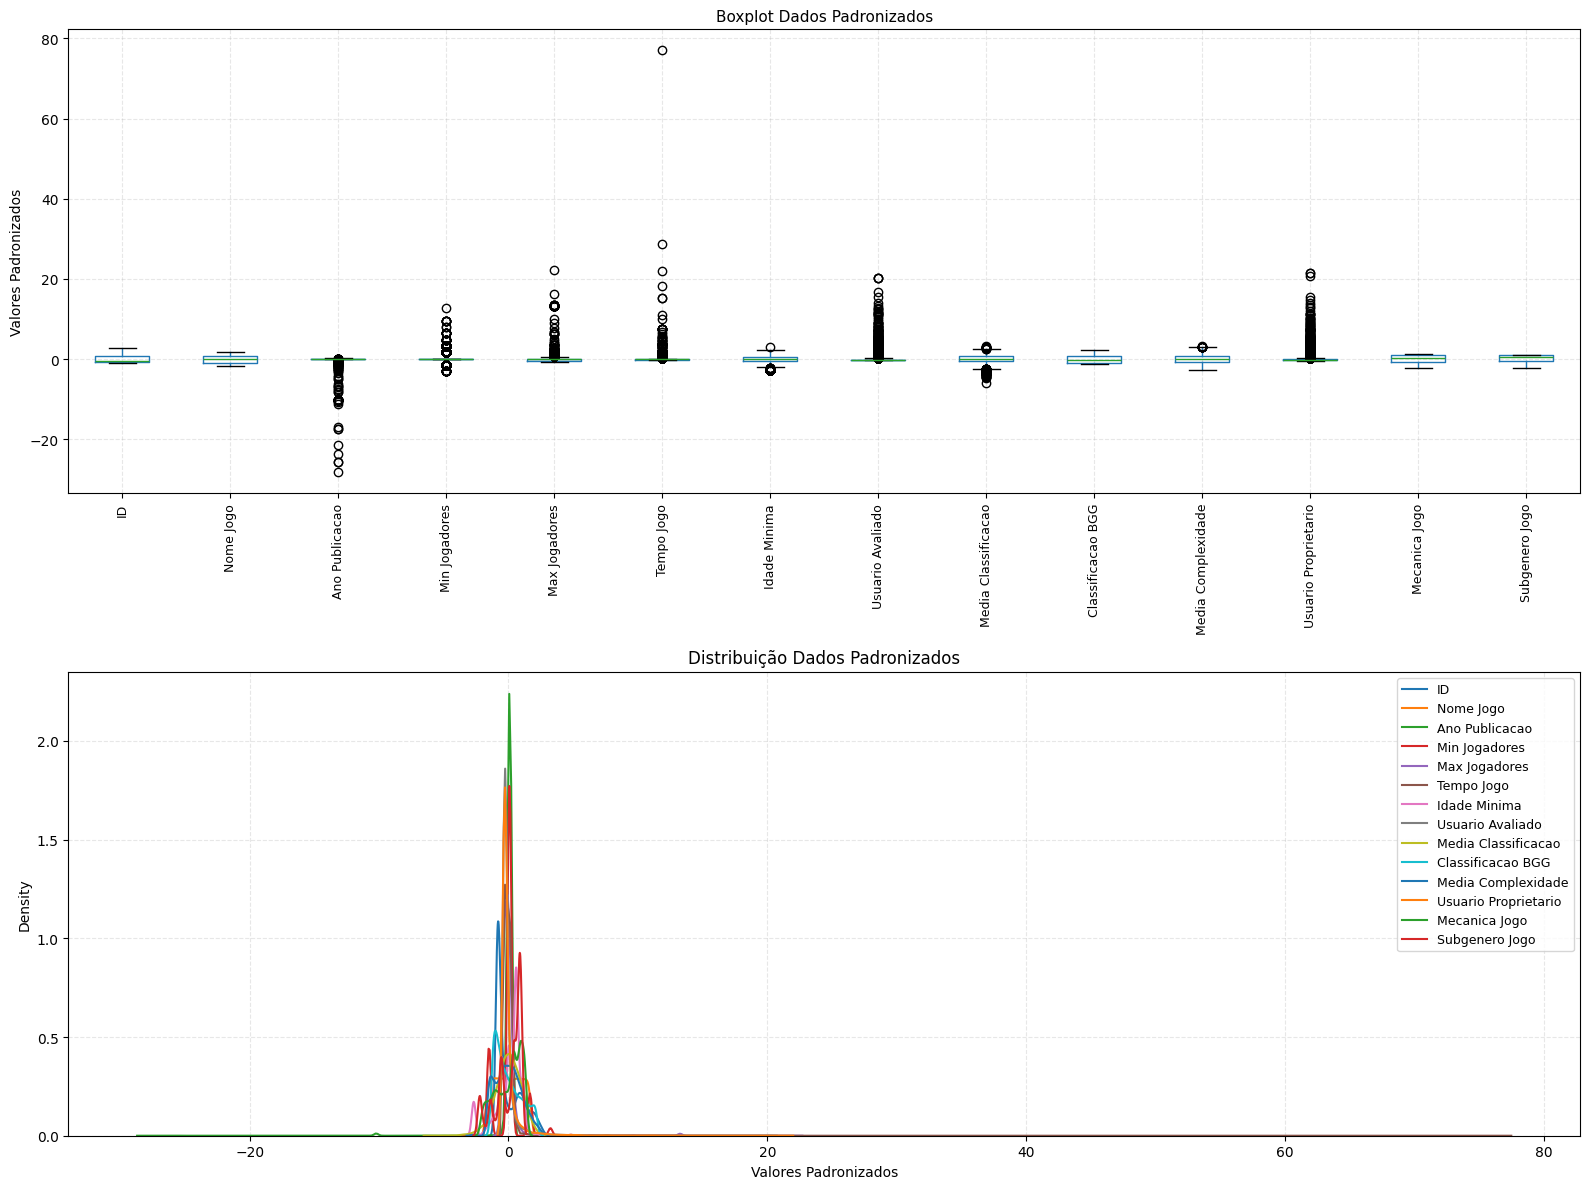


VERIFICAÇÃO DA PADRONIZAÇÃO:
------------------------------------------------------------
Número de variáveis.: 14
Amostras............: 9709
Média global........: 0.000000 (deve ser ~0)
Desvio padrão global: 1.000004 (deve ser ~1)
------------------------------------------------------------


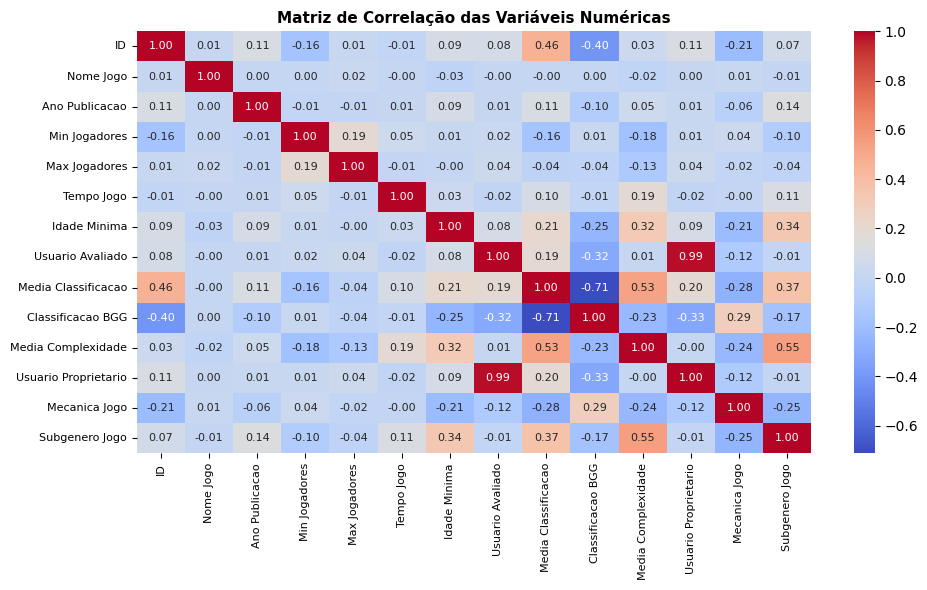


✅ Conclusão etapa... 4/12: Transformação de dados
------------------------------------------------------------

🔄 Iniciando etapa... 5/12: Redução de dimensionalidade
REDUÇÃO DE DIMENSIONALIDADE

PCA EM 2D
------------------------------------------------------------
PCA aplicado para visualização 2D
• Amostras....................: 9709
• Variância explicada pelo PC1: 24.58%
• Variância explicada pelo PC2: 16.65%
• Variância total explicada...: 41.23%

PCA PARA 95% DE VARIÂNCIA
------------------------------------------------------------
• Número de componentes originais.........: 12
• Número de componentes para 95% variância: 10
• Variância total explicada...............: 98.26%
• Redução dimensional.....................: 16.67%


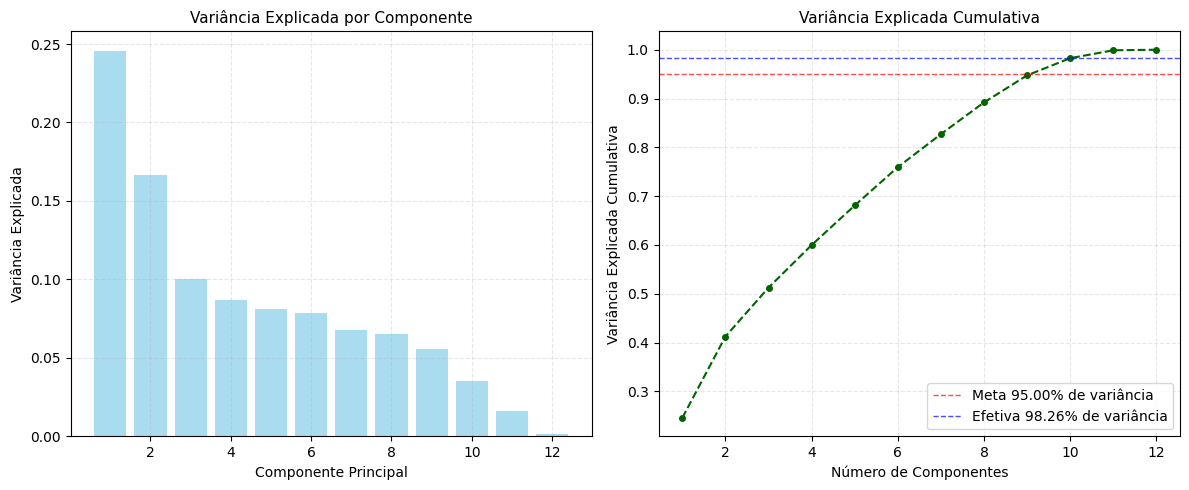


Resultado do PCA com 10 componentes (primeiras 5 linhas):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,8.5703,8.6067,-2.6109,1.7934,1.6008,1.8721,1.7210,-0.6394,-0.5579,1.1906
1,7.6914,9.0236,-1.4583,1.5923,1.5772,1.7369,0.6859,-0.8463,-1.0204,0.4903
2,4.6931,3.1702,-0.7932,1.1313,0.5687,0.1820,0.2494,1.7603,-0.5365,1.0194
3,9.6424,13.2777,-3.5996,3.0530,2.8250,2.2817,2.5423,0.0353,-1.2022,0.8392
4,4.7606,1.3999,1.2372,0.6491,-0.2062,0.3469,-0.9203,-0.5656,-0.8702,1.4517



SELEÇÃO DE FEATURES COM PCA 95%
------------------------------------------------------------
Top 10 features selecionadas para clustering:
['Subgenero Jogo', 'Idade Minima', 'Tempo Jogo', 'Media Complexidade', 'Min Jogadores', 'Classificacao BGG', 'Mecanica Jogo', 'Max Jogadores', 'Ano Publicacao', 'Media Classificacao']
---
  Componente  Variância Explicada  Variância Acumulada
0        PC1               0.2458               0.2458
1        PC2               0.1665               0.4123
2        PC3               0.1003               0.5126
3        PC4               0.0871               0.5997
4        PC5               0.0811               0.6809
5        PC6               0.0785               0.7593
6        PC7               0.0677               0.8270
7        PC8               0.0650               0.8920
8        PC9               0.0555               0.9474
9       PC10               0.0352               0.9826

• FEATURES MAIS RELEVANTES (5 de 10 das componentes principais):
S

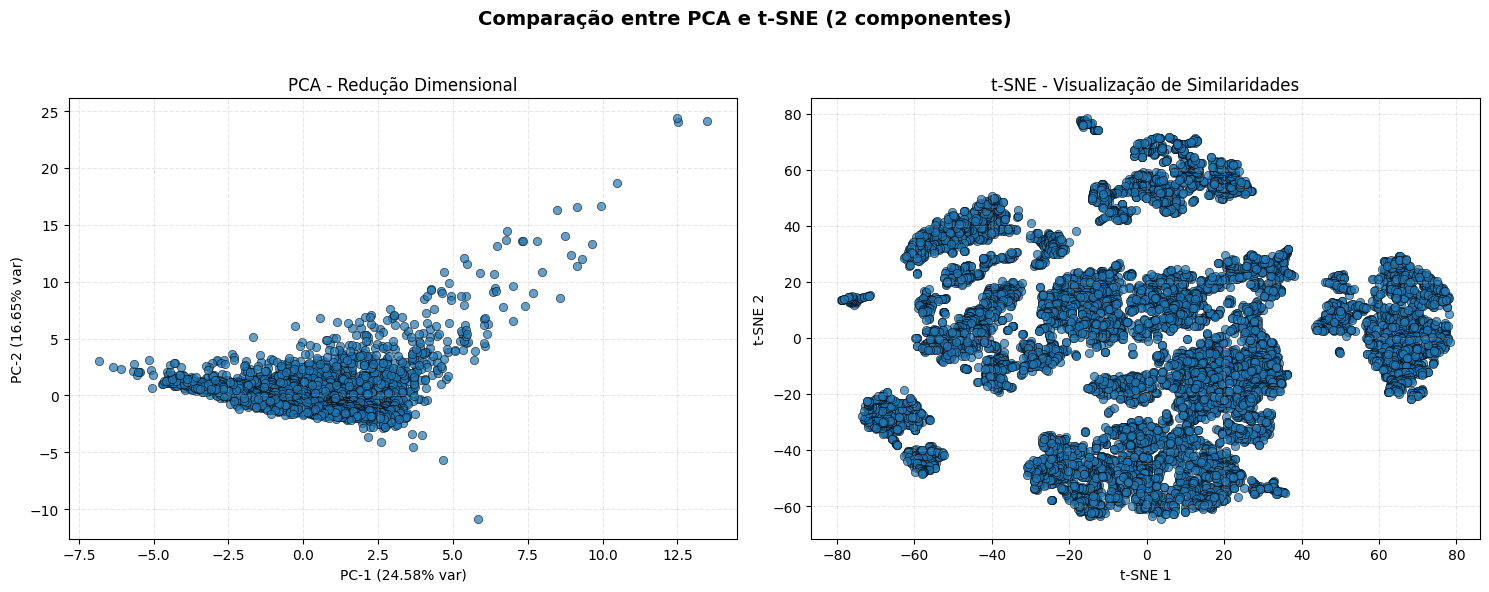


✅ Conclusão etapa... 5/12: Redução de dimensionalidade
------------------------------------------------------------

🔄 Iniciando etapa... 6/12: Clusterização K-Means
K-MEANS - Clusterização Particional
Calculando métricas para diferentes valores de K... 2 até 10
----------------------------------------------------------------------------
K= 2 | Silhouette=0.2414 | Calinski= 2177.50 | Davies=1.7031 | WCSS=79301.01
K= 3 | Silhouette=0.2447 | Calinski= 1758.95 | Davies=1.2729 | WCSS=71261.64
K= 4 | Silhouette=0.1861 | Calinski= 1598.38 | Davies=1.4528 | WCSS=64982.75
K= 5 | Silhouette=0.1619 | Calinski= 1643.40 | Davies=1.4110 | WCSS=57881.06
K= 6 | Silhouette=0.1970 | Calinski= 1676.32 | Davies=1.3094 | WCSS=52092.32
K= 7 | Silhouette=0.2176 | Calinski= 1713.42 | Davies=1.1595 | WCSS=47139.69
K= 8 | Silhouette=0.2198 | Calinski= 1884.79 | Davies=1.0144 | WCSS=41139.54
K= 9 | Silhouette=0.2278 | Calinski= 1884.10 | Davies=1.0398 | WCSS=38016.42
K=10 | Silhouette=0.2181 | Calinski= 1886.4

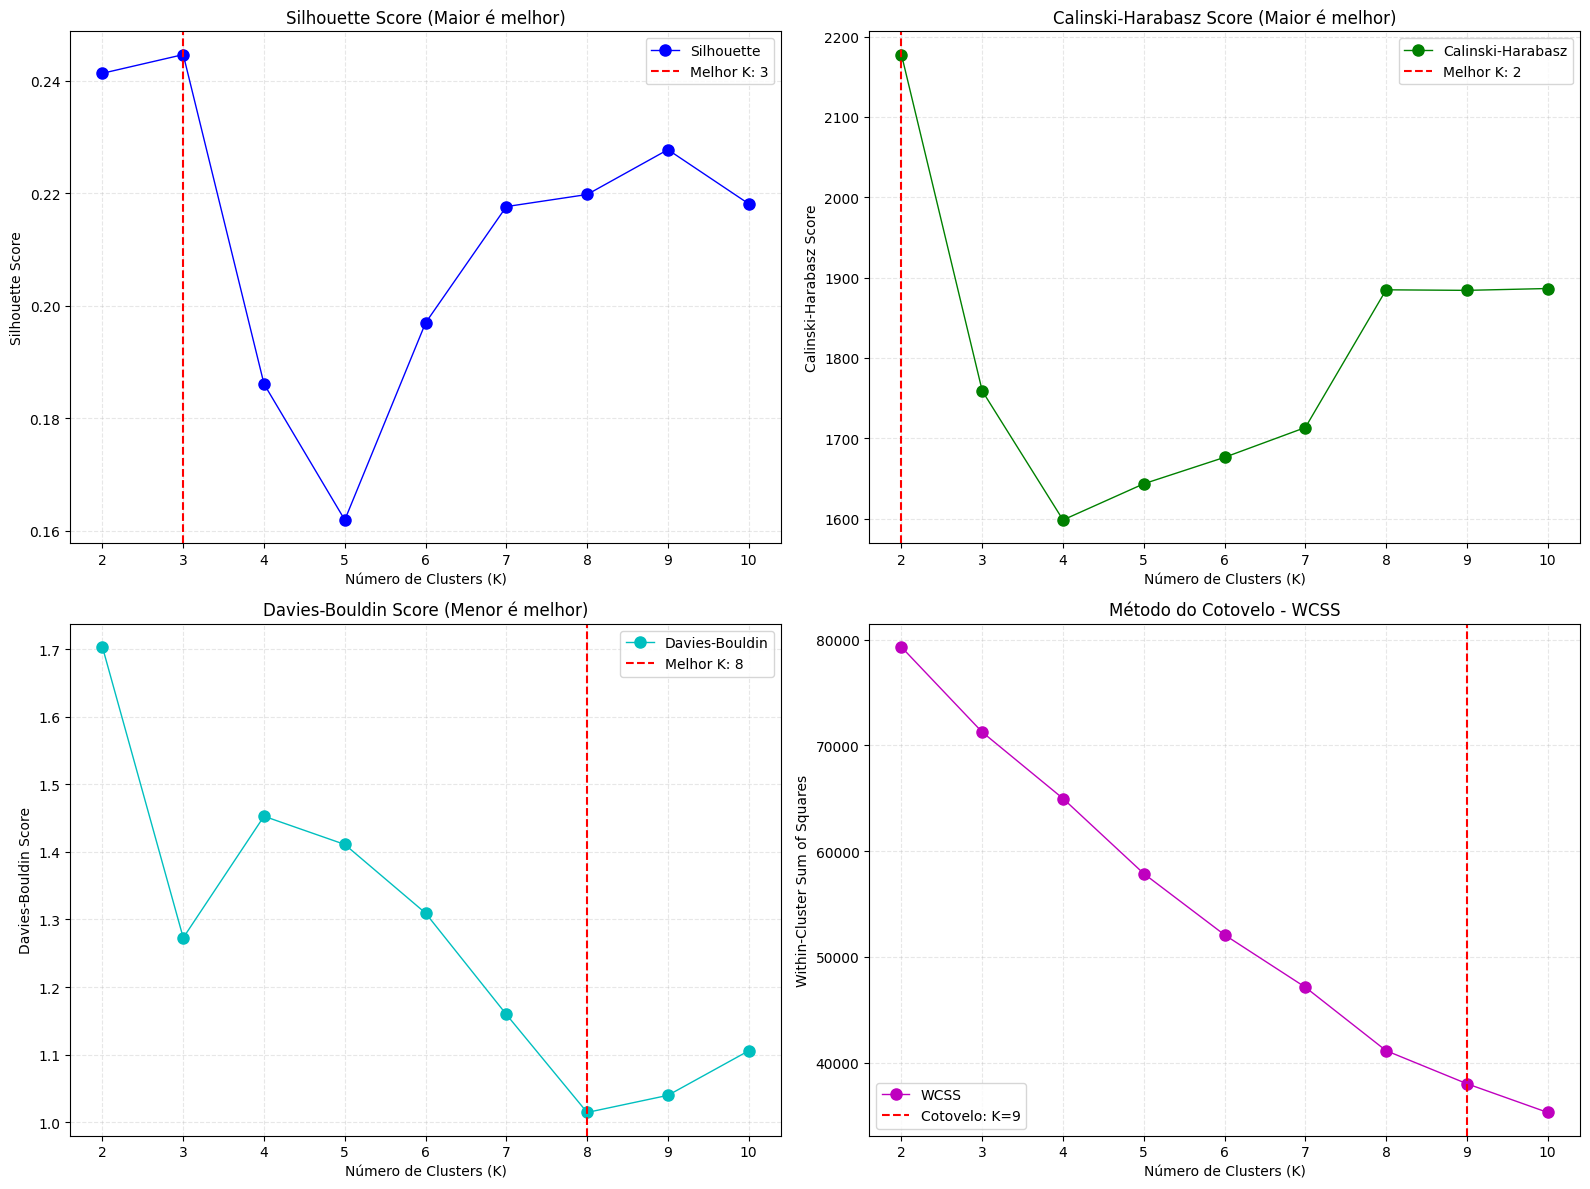


------------------------------------------------------------
RESUMO DOS MELHORES VALORES DE K:
------------------------------------------------------------
• Silhouette Score..: K = 3 (maior score: 0.2447)
• Calinski-Harabasz.: K = 2 (maior score: 2177.50)
• Davies-Bouldin....: K = 8 (menor score: 1.0144)
• Método do Cotovelo: K = 9
------------------------------------------------------------
Contagem.....: Counter({3: 1, 2: 1, 8: 1, 9: 1})
⭐ K SUGERIDO: 3 (baseado nas métricas)
• Comentário.: Métricas diferenes, prioriza K maior entre Silhouette e Calinski.
------------------------------------------------------------

✅ Conclusão etapa... 6/12: Clusterização K-Means
------------------------------------------------------------

🔄 Iniciando etapa... 7/12: Clusterização Hierárquica
HCA - Clusterização Hierárquica


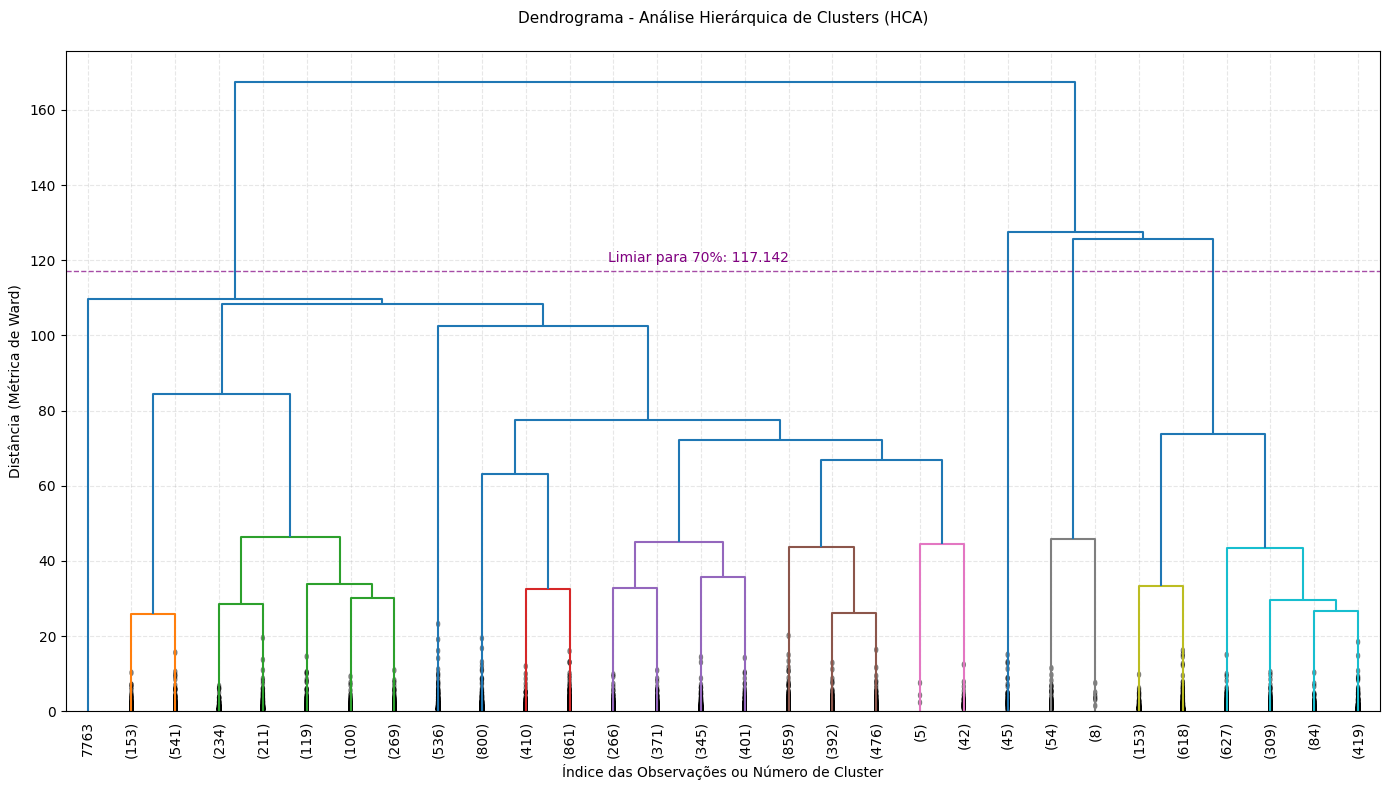

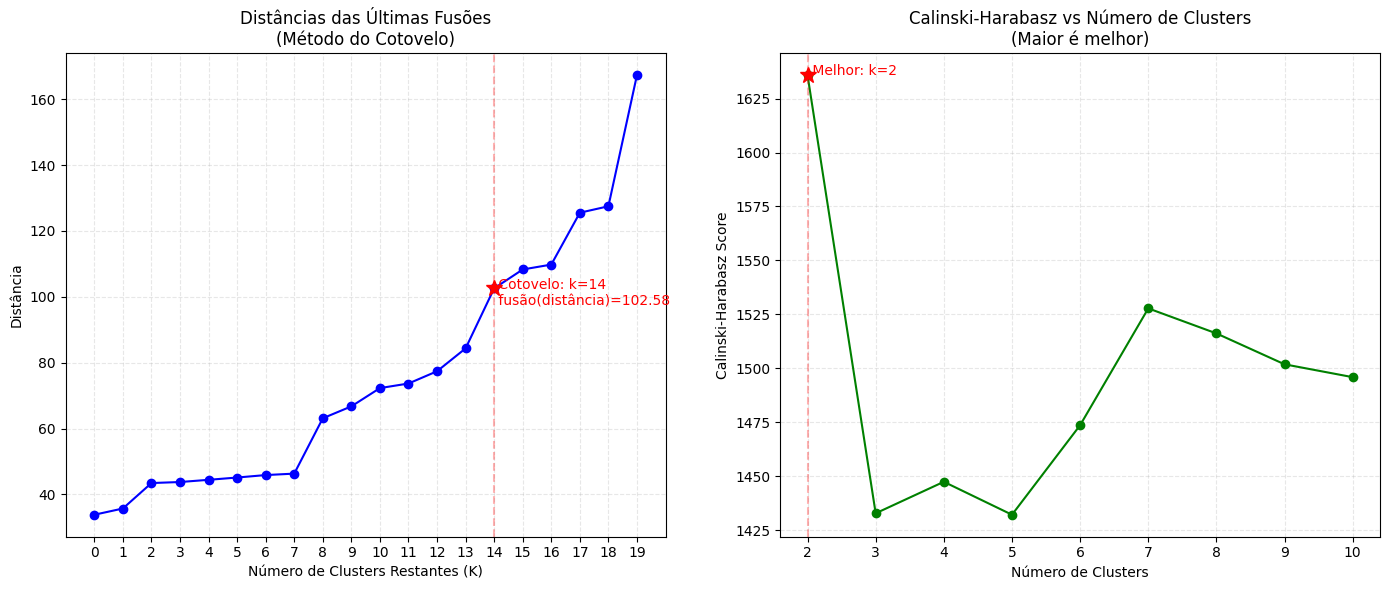

Nº de clusters cotovelo distância-fusões: k = 14
Nº de clusters limiar de 70% Dendrograma: k = 4
Nº de clusters pelo Calinski-Harabasz...: k = 2

Métricas de Avaliação do HCA
Silhouette Score.......: 0.1557
Calinski-Harabasz Score: 1635.9
Davies-Bouldin Score...: 1.2616

✅ Conclusão etapa... 7/12: Clusterização Hierárquica
------------------------------------------------------------

🔄 Iniciando etapa... 8/12: Clusterização DBSCAN
DBSCAN - Clusterização Baseado em Densidade
Calculando métricas para diferentes valores de eps e min_samples
--------------------------------------------------------------------------------
eps: 0.50 | min_samples:  3 | Silhouette:  -0.4530 | clusters: 261 | ruído: 4234
eps: 0.50 | min_samples:  5 | Silhouette:  -0.4533 | clusters:  91 | ruído: 5434
eps: 0.50 | min_samples:  7 | Silhouette:  -0.4431 | clusters:  57 | ruído: 6192
eps: 0.50 | min_samples: 10 | Silhouette:  -0.3693 | clusters:  22 | ruído: 7070
eps: 0.70 | min_samples:  3 | Silhouette:  -0.3546 

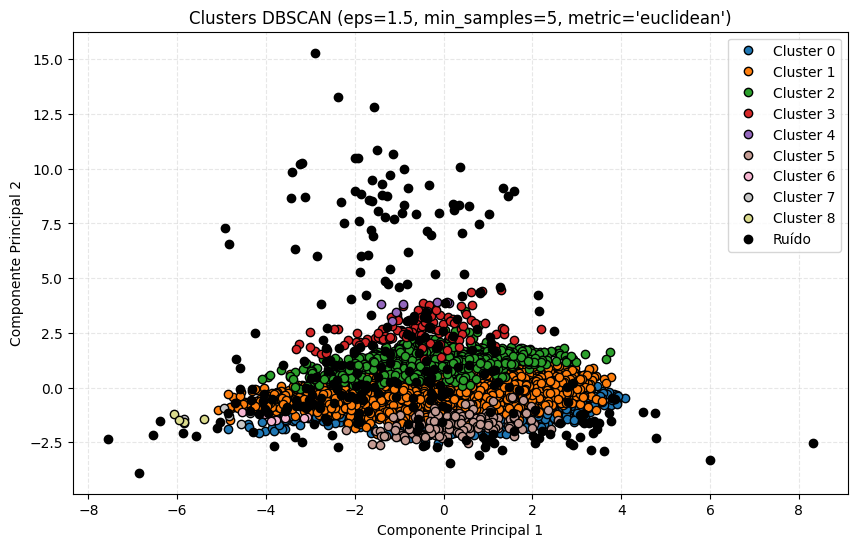


✅ Conclusão etapa... 8/12: Clusterização DBSCAN
------------------------------------------------------------

🔄 Iniciando etapa... 9/12: Comparação dos modelos
COMPARAÇÃO MODELOS DE CLUSTERIZAÇÃO
Comparação dos Modelos de Clusterização:


,N_Clusters,Silhouette-Score,Calinski-Harabasz,Davies-Bouldin
Modelo,,,,
K-Means,3,0.2447,1758.9502,1.2729
HCA,14,0.1557,1464.9924,1.2616
DBSCAN,9,0.0536,223.9639,1.9201



⭐ Melhor modelo: K-Means (Silhouette-Score: 0.2447)

🧮 Modelo com Base nas Métricas:
     • Melhor Silhouette-Score.: K-Means com valor de    0.2447 (Quanto mais próximo de 1, melhor)
     • Melhor Calinski-Harabasz: K-Means com valor de 1758.9502 (Quanto maior, melhor)
     • Melhor Davies-Bouldin...: HCA     com valor de    1.2616 (Quanto mais próximo de 0, melhor)

✅ Conclusão etapa... 9/12: Comparação dos modelos
------------------------------------------------------------

🔄 Iniciando etapa... 10/12: Validação cruzada
VALIDAÇÃO CRUZADA (Cross-Validation)

Validação Cruzada - Silhouette Score - folds 5
------------------------------------------------------------
• Scores por Fold.........: ['0.24031', '0.24509', '0.24275', '0.24486', '0.24382']
• Média dos Scores........: 0.2434 🔴 → Clusters pobres ou sobrepostos
• Desvio padrão dos scores: 0.0017 🟢 → Baixa dispersão (ideal)
• Variação relativa.......:  0.71% 🟢 → Baixa variabilidade relativa (ideal)

------------------------------

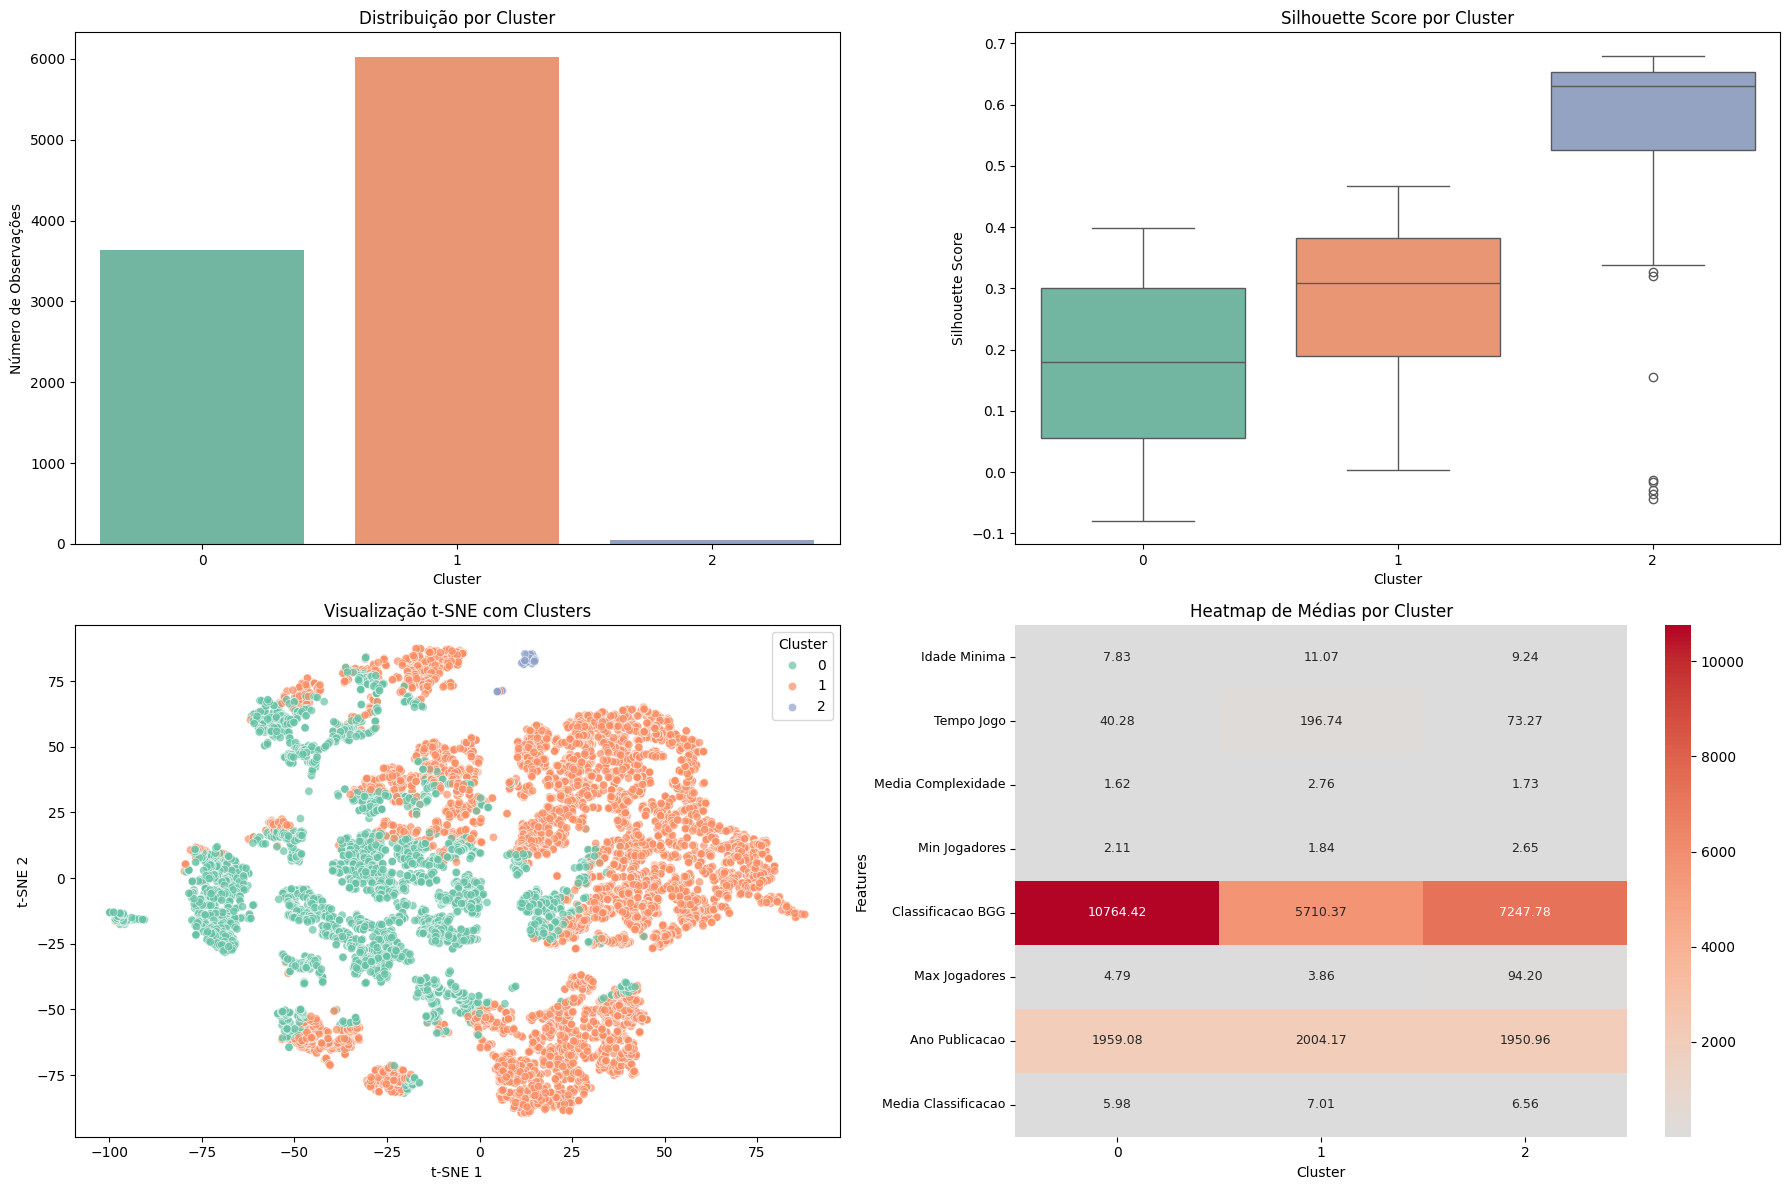


------------------------------------------------------------
QUADRO RESUMO DE MÉDIAS POR CLUSTER
------------------------------------------------------------


,Idade Minima,Tempo Jogo,Media Complexidade,Min Jogadores,Classificacao BGG,Max Jogadores,Ano Publicacao,Media Classificacao
Cluster,,,,,,,,
0,7.83,40.28,1.62,2.11,10764.42,4.79,1959.08,5.98
1,11.07,196.74,2.76,1.84,5710.37,3.86,2004.17,7.01
2,9.24,73.27,1.73,2.65,7247.78,94.20,1950.96,6.56



✅ Conclusão etapa... 11/12: Definição do modelo final
------------------------------------------------------------

🔄 Iniciando etapa... 12/12: Resumo dos resultados
RESUMO FINAL
Total Jogos Avaliados...: 9709
Melhor modelo...........: K-Means
Número ótimo de clusters: 3
Silhouette Score final..: 0.2447

------------------------------------------------------------
ANÁLISE DETALHADA DOS CLUSTERS
------------------------------------------------------------
🔍 CLUSTER 0 (3631 observações, 37.4%)
------------------------------------------------------------
• Média Classificação : 5.98
• Média Complexidade  : 1.62
• Tempo Médio de Jogo : 40.3 minutos
• Idade Mínima Média  : 7.8 anos
🏆 ** Jogo mais bem avaliado ** 
       • Nome Jogo    : RPGQuest
       • Nota         : 8.68
       • Proprietários: 44
       • Avaliados    : 49
• Subgênero mais comuns: Family Games, Abstract Games
------------------------------------------------------------
🔍 CLUSTER 1 (6027 observações, 62.1%)
------------

In [23]:
# BLOCO PRINCIPAL DE EXECUÇÃO
# =====================================================

# Função Principal para execução das etapas do pipeline
import time

def main():
    tempo_inicio = time.perf_counter()

    print("=" * 60)
    print("🔄 INICIANDO PIPELINE...")
    print("-- Aprendizado não supervisionado - Clusterização --")
    print("=" * 60)

    try:
        # Importar bibliotecas
        print("\n🔄 Iniciando etapa...")

        # Importando bibliotecas
        importar_bibliotecas() # etapa 0

        print("✅ Bibliotecas importadas com sucesso!")
        print("-" * 60)

        # Criando objeto pipeline
        pipeline = TabuleiroClusteringPipeline()

        # Adicionando métodos de implementação à classe
        TabuleiroClusteringPipeline.carrega_dados = carrega_dados_implementacao
        TabuleiroClusteringPipeline.analise_exploratoria = analise_exploratoria_implementacao
        TabuleiroClusteringPipeline.preprocessa_dados = preprocessa_dados_implementacao
        TabuleiroClusteringPipeline.tranformacao_dados = transformacao_dados_implementacao
        TabuleiroClusteringPipeline._label_encoding = _label_encoding_implementacao
        TabuleiroClusteringPipeline._standardization = _standardization_implementacao
        TabuleiroClusteringPipeline._transformacao_resultado_grafico = _transformacao_resultado_grafico_implementacao
        TabuleiroClusteringPipeline.reducao_dimensionalidade = reducao_dimensionalidade_implementacao
        TabuleiroClusteringPipeline._pca_em_2D = _pca_em_2D_implementacao
        TabuleiroClusteringPipeline._pca_em_95_variancia = _pca_em_95_variancia_implementacao
        TabuleiroClusteringPipeline._selecao_features_pca_95 = _selecao_features_pca_95_implementacao
        TabuleiroClusteringPipeline._tsne_em_2D = _tsne_em_2D_implementacao
        TabuleiroClusteringPipeline._comparativo_pca_tsne_em_2D = _comparativo_pca_tsne_em_2D_implementacao
        TabuleiroClusteringPipeline.kmeans_clustering = kmeans_clustering_implementacao
        TabuleiroClusteringPipeline.hierarchical_clustering = hierarchical_clustering_implementacao
        TabuleiroClusteringPipeline.dbscan_clustering = dbscan_clustering_implementacao
        TabuleiroClusteringPipeline.modelo_comparacao = modelo_comparacao_implementacao
        TabuleiroClusteringPipeline.cross_validation = cross_validation_implementacao
        TabuleiroClusteringPipeline.final_clustering = final_clustering_implementacao
        TabuleiroClusteringPipeline.resumo_resultado = resumo_resultado_implementacao

        # Lista de etapas com descrições
        etapas = [
            (pipeline.carrega_dados, "Carregamento de dados"),                 # etapa 1
            (pipeline.analise_exploratoria, "Análise exploratória de dados"),  # etapa 2
            (pipeline.preprocessa_dados, "Pré-processamento de dados"),        # etapa 3
            (pipeline.tranformacao_dados, "Transformação de dados"),           # etapa 4
            (pipeline.reducao_dimensionalidade, "Redução de dimensionalidade"),# etapa 5
            (pipeline.kmeans_clustering, "Clusterização K-Means"),             # etapa 6
            (pipeline.hierarchical_clustering, "Clusterização Hierárquica"),   # etapa 7
            (pipeline.dbscan_clustering, "Clusterização DBSCAN"),              # etapa 8
            (pipeline.modelo_comparacao, "Comparação dos modelos"),            # etapa 9
            (pipeline.cross_validation, "Validação cruzada"),                  # etapa 10
            (pipeline.final_clustering, "Definição do modelo final"),          # etapa 11
            (pipeline.resumo_resultado, "Resumo dos resultados")               # etapa 12
        ]

        # Garante que cada etapa seja executada de forma sequencial, respeitando sua ordem de execução
        # Exibir mensagens de início e conclusão da etapa
        for i, (etapa, descricao) in enumerate(etapas, 1):
            print(f"\n🔄 Iniciando etapa... {i}/12: {descricao}")
            resultado = etapa()

            # Verifica se a etapa foi concluída com sucesso
            if resultado is False:
                raise Exception(f"Etapa {i} ({descricao}) falhou")

            print(f"\n✅ Conclusão etapa... {i}/12: {descricao}")
            print("-" * 60)

    # Caso ocorra um erro de execução
    except Exception as e:
        print(f"\n ❌ ERRO NO PIPELINE: {e}")
        print("\n ⚠️ Execução interrompida!")
        print("-" * 60)
        return False

    print("\n" + "=" * 60)
    print("🏁 PIPELINE CONCLUÍDO COM SUCESSO! 🔚")

    # Obter o tempo de execução
    tempo_fim = time.perf_counter()
    tempo_execucao = tempo_fim - tempo_inicio
    minutos = int(tempo_execucao // 60)
    segundos = int(tempo_execucao % 60)
    print(f"⏱️ Tempo de execução: {minutos} min {segundos} seg")

    print("=" * 60)
    return True

# =====================================================

# Executa o pipeline principal
if __name__ == "__main__":
    main()